<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis I

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Of all the channels, how many free and how many paid?](#section401)<br/>
    - 4.2 [What are the offerings under Paid?](#section402)<br/>
    - 4.3 [What trends are observed in the Sample data for Payment Type?](#section403)<br/>
    - 4.4 [What trends are observed in the Sample data for Genre ?](#section404)<br/>
    - 4.5 [4.5 What is the average cost that can be deduced using Pay Type and Genre information ?](#section404)<br/>

    - 
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


<a id=section2></a>

### 2. Data Loading and Description


<a id=section201></a>

- The dataset consists of the information about channels list published by TRAI. Various variables present in the dataset includes channel name along with their cost, genre, language and channel type.
- The dataset comprises of 589 observations of 7 columns. Below is a table showing names of all the columns and their description.

| Column Name         | Description                                               |
| ------------------- |:-------------                                            :| 
| Pack_Name           | Channel Name                                              | 
| Pack_Value          | Monthly Cost                                              |  
| Monthly_Cost_in_Rs  | Cost per month                                            | 
| Choose_Yes_No       | Wishlist selection                                        |   
| Channel_Genre       | Genre - movies,music,sports,infotainment etc              |
| Channel_Language    | Language                                                  |
| Channel_Type        | SD or HD                                                  |


#### Some Background Information
The Telecom Regulatory Authority of India (TRAI) recently drafted new regulations and directed various DTH service providers and operators to implement them.

These regulations were set up to ensure all operators in the DTH and cable ecosystem get a fair share of earnings. The immediate benefit will be passed to consumers as they get to choose what they want to watch and pay for it accordingly. The deadline for setting up new regulations is January 31, and new plans will come into existence on February 1, 2019.

The intent was to make the process of invoicing transparent and help customers undersand what they are paying for by introducion of itemized billing. The cost of Network fee and channels/pack cost are added on to the invoices along with the GST to give the customer the complete information of what services are availed and what are the respective channel's cost that they have subscribed. 

However, there is been noise around increased in rate of cable fees (earlier they used to pay 250 rs or less but now they have to pay around 350 rs).

The data analysis exercise is done to check if what the TRAI says "dont compare apples to oranges and that over 90% dont view move than 50 channels so chose your channels wisely and pay only for what you view"?
And also to check if the cable fee is indeed going to be more than 250 rs (we will study a few samples and then try to conclude based on the study of that sample)

#### Importing packages                                          

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output
import math as mathObj
import os as osObj
import Configurator


#### Importing the Dataset

In [2]:
  
def ReadMyWishListPackData(pd, Datafilename='',MonthlyNetworkFee=153.40,Ch_Type='SD',FilterQuery='KeepYesSD'):
    
    # Load spreadsheet
    xl = pd.ExcelFile(Datafilename)
    Email_IDs ='NEP'
    #set the custom columnnames that you want to use while parsing
    columnNames=['Channel_Name','Channel_Value','Channel_Cost_Per_Month','Chosen','Genre','Language','Ch_Type']
        
    #**Fetch & Store the data of MyPack in a new Data frame df_myCurrentPack Begin Code***
    df_myCurrentPack = pd.DataFrame([['Network Fee 0 to 100 Chs','153.40/Monthly',MonthlyNetworkFee,'Yes','NA','NA','SD']],
                                    columns=columnNames)
    
    # Get all the sheet names which has myCurrent Pack and other Packs to compare cost
    for sheetname in xl.sheet_names :
        # Load a sheet into a DataFrame by name: 
        if sheetname.lower() == 'mypack' :
            #df_myCurrentPack = xl.parse(sheetname,names=columnNames)
            dftemp = pd.DataFrame([],columns=columnNames)
            dftemp = xl.parse(sheetname,names=columnNames)
            df_myCurrentPack = df_myCurrentPack.append(dftemp)
        elif sheetname.lower() == 'mymandatorychannels' :
            #df_myCurrentPack = xl.parse(sheetname,names=columnNames)
            dftemp = pd.DataFrame([],columns=columnNames)
            dftemp = xl.parse(sheetname,names=columnNames)
            dftemp['Ch_Type'] = "SD"
            dftemp['Chosen'] = "Yes"
            dftemp['Channel_Cost_Per_Month'] = 0.0
            df_myCurrentPack = df_myCurrentPack.append(dftemp)
        elif sheetname.lower() == 'myemail' :
            dftemp = xl.parse(sheetname,names=['EmailID'])
            dftemp['EmailID'] = dftemp['EmailID'].str.strip() #remove spaces
            dftemp = dftemp.drop_duplicates(keep='first') #remove duplicates
            Email_IDs = ';'.join(dftemp['EmailID'].tolist()) #add semicolon as email id seperator
    #**Fetch & Store the data of MyPack in a new Data frame df_myCurrentPack and the Packs in df_OtherAvailablePacks End Code***

    #********Clean up the data for spaces from the 2 dataframes Begin Code*******************************
    
    df_myCurrentPack['Channel_Name'] = df_myCurrentPack['Channel_Name'].str.strip() #remove spaces
    df_myCurrentPack['Channel_Name'] = df_myCurrentPack['Channel_Name'].str.lower() #convert to lower cases all the channels
    df_myCurrentPack['Genre'] = df_myCurrentPack['Genre'].str.strip()               #remove spaces
    df_myCurrentPack['Genre'] = df_myCurrentPack['Genre'].str.lower()               #convert to lower cases all the channels
    df_myCurrentPack['Language'] = df_myCurrentPack['Language'].str.strip()         #remove spaces
    df_myCurrentPack['Language'] = df_myCurrentPack['Language'].str.lower()         #convert to lower cases all the channels
    df_myCurrentPack['Ch_Type'] = df_myCurrentPack['Ch_Type'].str.strip()           #remove spaces
 
    df_myCurrentPack['Pack_Name1'] = 'Alacarte'
    df_myCurrentPack['Broadcaster_x'] = 'Alacarte'
    df_myCurrentPack['Send_EmailTo'] = Email_IDs
    
    #Filter columns only Channel Name, Pack_Name and its monthly cost
    df_myCurrentPack = df_myCurrentPack.filter(items=['Channel_Name','Channel_Cost_Per_Month','Chosen',
                                                      'Send_EmailTo','Genre','Language','Ch_Type'])
    
    #Filter only Pack_Names which have cost greater than 0
    if FilterQuery =='KeepYesSD' :
        #df_myCurrentPack = df_myCurrentPack.query("Channel_Cost_Per_Month>0 and Chosen=='Yes' and Ch_Type=='" + Ch_Type +"'")
        df_myCurrentPack = df_myCurrentPack.query("Chosen=='Yes' and Ch_Type=='SD'")
    elif FilterQuery =='KeepYes' :
        df_myCurrentPack = df_myCurrentPack.query("Chosen=='Yes'")
    
    
    #after filtering for cost>0 and choosen = yes drop any duplicates
    df_myCurrentPack = df_myCurrentPack.sort_values(by=['Channel_Cost_Per_Month','Channel_Name'],ascending=[False,True])
    df_myCurrentPack = df_myCurrentPack.drop_duplicates(keep='first')
    df_myCurrentPack = df_myCurrentPack.reset_index(drop=True)
    
    #print("after dropping duplicates ={}".format(df_myCurrentPack['Channel_Name'].count()))
    
    #********Clean up the data for spaces from the 2 dataframes End Code*******************************
    return df_myCurrentPack

osObj.chdir(Configurator.PyPackProgPath)

Datafilename = 'Package_TataSkySD_FamilyKidsSports.xlsx'
ExcelFileName = Datafilename[Datafilename.rfind("\\")+1:] 
CurrDirectory = osObj.getcwd()

#ServiceProviderName = 'TNMulticityDigital'
ServiceProviderName = 'TataSky'
SPPackfilename = osObj.path.join(CurrDirectory, ExcelFileName)
#print(SPPackfilename)

print("*****Reading Pack Data Started****")
#Read the Wsihlist and email id details for the user provided in MyPack and MyEmail worksheet
df_myPackData = ReadMyWishListPackData(pd, Datafilename=SPPackfilename,
                                          MonthlyNetworkFee=Configurator.MonthlyNetworkFee,
                                          Ch_Type='SD',FilterQuery='None')
print("*****Reading Pack Data Completed*****" + Datafilename)

*****Reading Pack Data Started****
*****Reading Pack Data Completed*****Package_TataSkySD_FamilyKidsSports.xlsx


## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [3]:
df_myPackData.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(589, 7)

titanic_data has __891 rows__ and __12 columns.__

In [4]:
df_myPackData.columns                                            # This will print the names of all columns.

Index(['Channel_Name', 'Channel_Cost_Per_Month', 'Chosen', 'Send_EmailTo',
       'Genre', 'Language', 'Ch_Type'],
      dtype='object')

In [5]:
df_myPackData.head()

,Channel_Name,Channel_Cost_Per_Month,Chosen,Send_EmailTo,Genre,Language,Ch_Type
0,network fee 0 to 100 chs,153.40,Yes,,na,na,SD
1,&flix hd,22.42,No,,movies,english,HD
2,&pictures hd,22.42,No,,movies,hindi,HD
3,&prive hd,22.42,No,,movies,english,HD
4,&tv hd,22.42,No,,gec,hindi,HD


<a id=section301></a>

In [6]:
df_myPackData.tail()                                                   # This will print the last n rows of the Data Frame

,Channel_Name,Channel_Cost_Per_Month,Chosen,Send_EmailTo,Genre,Language,Ch_Type
584,vtv gujarati,0.0,No,,news,gujarati,SD
585,we tv,0.0,No,,gec,malayalam,SD
586,win tv,0.0,No,,news,tamil,SD
587,wow cinema,0.0,No,,movies,hindi,SD
588,wow music,0.0,No,,music,hindi,SD


In [7]:
df_myPackData.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 7 columns):
Channel_Name              589 non-null object
Channel_Cost_Per_Month    589 non-null float64
Chosen                    589 non-null object
Send_EmailTo              589 non-null object
Genre                     589 non-null object
Language                  589 non-null object
Ch_Type                   589 non-null object
dtypes: float64(1), object(6)
memory usage: 32.3+ KB


In [8]:
df_myPackData.describe(include='all')

,Channel_Name,Channel_Cost_Per_Month,Chosen,Send_EmailTo,Genre,Language,Ch_Type
count,589,589.000000,589,589,589,589,589
unique,589,NaN,2,1,11,23,2
top,abp asmita,NaN,No,,news,hindi,SD
freq,1,NaN,465,589,182,156,498
mean,NaN,5.170119,NaN,NaN,NaN,NaN,NaN
std,NaN,9.862723,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.120000,NaN,NaN,NaN,NaN,NaN
75%,NaN,7.080000,NaN,NaN,NaN,NaN,NaN


In [9]:
df_myPackData.isnull().sum()

Channel_Name              0
Channel_Cost_Per_Month    0
Chosen                    0
Send_EmailTo              0
Genre                     0
Language                  0
Ch_Type                   0
dtype: int64

#From the above output we can see that all columns contains non null values, hence the data looks clean.

<a id=section302></a>

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [10]:
profile = pandas_profiling.ProfileReport(df_myPackData)
profile.to_file(outputfile="myPackData_before_preprocessing.html")
print("Pre profiling processing completed....")

Pre profiling processing completed....


Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __titanic_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

### 3.3 Preprocessing

- Adding New Categories for further Analysis <br/>
    - Adding PayType colums for segeragating Free and Paid
    - Adding PayCat as price category.Segmenting CostPerMonth column as per the below, 
        -as __Free__, Cost equal to zero
        -as  __Low__, Cost less than 3; 
        -as __Moderate__, Cost greater than 3 but less than 8; 
        -as __High__ Cost >8<=15 ; 
        -as __VeryHigh__ Cost >15<30;
        -as __NCF__ Cost >150.

In [11]:
df_myPackData.drop('Send_EmailTo', axis = 1,inplace = True)
print("Send_EmailTo Dropped.")

Send_EmailTo Dropped.


- Segmenting channels as Free or Paid first.

In [12]:
df_myPackData['PayType'] = df_myPackData.apply(lambda x: 'Free' if x['Channel_Cost_Per_Month'] ==0 else 'Paid',axis=1)
print("PayType created")

PayType created


In [13]:
def compute_pay_category(x):
    """ 
    Return Free if price is zero:
    ==0 = Free
    >0  = Paid
    """
    if x == 0:
        return 'A-Free'
    elif x>0 and x<=3:
        return 'B-(0-3)Low'
    elif x>3 and x<=8:
        return 'C-(3-8)Moderate'
    elif x>8 and x<=15:
        return 'D-(8-15)High'
    elif x>15 and x<=30:
        return 'E-(15-30)Very High'
    elif x>150:
        return 'F-NCF'
    
df_myPackData['PayCat'] = df_myPackData['Channel_Cost_Per_Month'].apply(compute_pay_category)

print("Pay Category Created")

Pay Category Created


In [14]:
def compute_region(x):
    """ 
    Return Free if price is zero:
    ==0 = Free
    >0  = Paid
    """
    if x == 'tamil' or x == 'malayalam' or x == 'kannada' or x == 'kannada' or x == 'telugu' or x == 'english':
        return 'South'
    elif x == 'japanese' or x == 'french' or x == 'german':
        return 'Others'
    else:
        return 'North'

df_myPackData['Region'] = df_myPackData['Language'].apply(compute_region)

print("Region Created")
df_myPackData.head(10)

Region Created


,Channel_Name,Channel_Cost_Per_Month,Chosen,Genre,Language,Ch_Type,PayType,PayCat,Region
0,network fee 0 to 100 chs,153.40,Yes,na,na,SD,Paid,F-NCF,North
1,&flix hd,22.42,No,movies,english,HD,Paid,E-(15-30)Very High,South
2,&pictures hd,22.42,No,movies,hindi,HD,Paid,E-(15-30)Very High,North
3,&prive hd,22.42,No,movies,english,HD,Paid,E-(15-30)Very High,South
4,&tv hd,22.42,No,gec,hindi,HD,Paid,E-(15-30)Very High,North
5,asianet,22.42,No,gec,malayalam,SD,Paid,E-(15-30)Very High,South
6,asianet hd,22.42,No,gec,malayalam,HD,Paid,E-(15-30)Very High,South
7,colors,22.42,Yes,gec,hindi,SD,Paid,E-(15-30)Very High,North
8,colors hd,22.42,No,gec,hindi,HD,Paid,E-(15-30)Very High,North
9,colors kannada,22.42,No,gec,kannada,SD,Paid,E-(15-30)Very High,South


In [15]:
df_myPackData[df_myPackData.PayType=='Paid'].head(5)

,Channel_Name,Channel_Cost_Per_Month,Chosen,Genre,Language,Ch_Type,PayType,PayCat,Region
0,network fee 0 to 100 chs,153.40,Yes,na,na,SD,Paid,F-NCF,North
1,&flix hd,22.42,No,movies,english,HD,Paid,E-(15-30)Very High,South
2,&pictures hd,22.42,No,movies,hindi,HD,Paid,E-(15-30)Very High,North
3,&prive hd,22.42,No,movies,english,HD,Paid,E-(15-30)Very High,South
4,&tv hd,22.42,No,gec,hindi,HD,Paid,E-(15-30)Very High,North


In [16]:
df_myPackData[df_myPackData.PayType=='Free'].head(5)

,Channel_Name,Channel_Cost_Per_Month,Chosen,Genre,Language,Ch_Type,PayType,PayCat,Region
313,10 tv,0.0,No,news,telugu,SD,Free,A-Free,South
314,99%,0.0,No,news,punjabi,SD,Free,A-Free,North
315,9x jalwa,0.0,No,music,hindi,SD,Free,A-Free,North
316,9x jhakaas,0.0,No,music,marathi,SD,Free,A-Free,North
317,9x tashan,0.0,No,music,punjabi,SD,Free,A-Free,North


In [17]:
df_myPackData.describe(include='all')

,Channel_Name,Channel_Cost_Per_Month,Chosen,Genre,Language,Ch_Type,PayType,PayCat,Region
count,589,589.000000,589,589,589,589,589,589,589
unique,589,NaN,2,11,23,2,2,6,3
top,abp asmita,NaN,No,news,hindi,SD,Paid,A-Free,South
freq,1,NaN,465,182,156,498,313,276,310
mean,NaN,5.170119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.862723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.120000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,7.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id=section304></a>

## 3.4 Post Pandas Profiling

In [18]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df_myPackData)
profile.to_file(outputfile="myPackData_after_preprocessing.html")
print("Post profiling processing completed....")

Post profiling processing completed....


Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also introduced new feature named PayType, Region and PayCat so that the pandas profiling report after preprocessing will give us more beneficial insights. You can compare the two reports.
In after_preprocessing.html report, observations:
- In the Dataset info, Total Missing(%) = 0.0%
- Number of variables = 9
- Observe the newly created variable PayCat, Region and PayType, Click on Toggle details to get more detailed information about it.

<a id=section4></a>

### 4. Questions

Is the cost increased for the users who have been paying a monthly cable fee of Rs 250 or less?

### 4.1 Of all the channels, how many free and how many paid ?

- Using Countplot

We can see that there are more offerings available in Free than paid.

- Using groupby lets dig into the SD offerings

In [19]:
dfTemp = df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp.groupby(['PayType'])['Genre'].count()

PayType
Free    274
Paid    224
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Pie Plot- Paid vs Free')

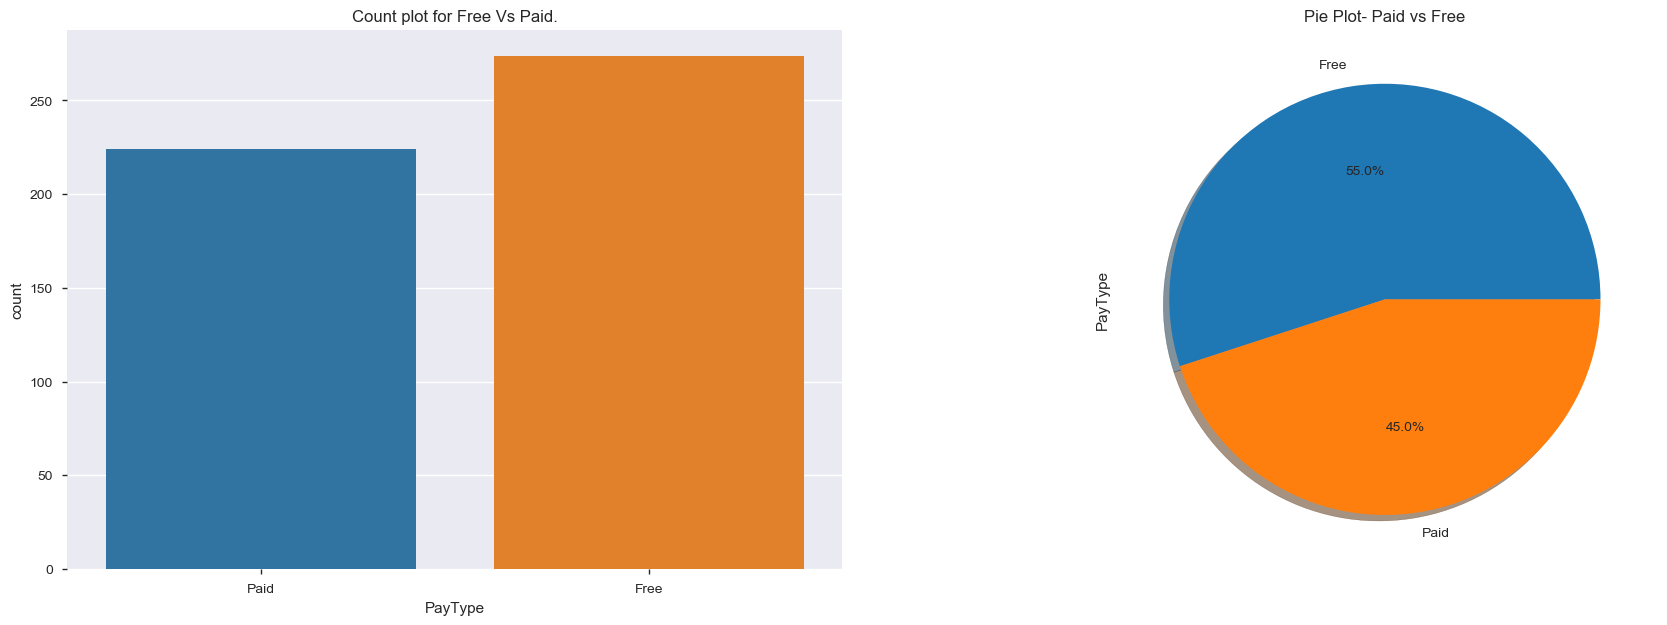

In [20]:
f,ax = plt.subplots(1,2,figsize=(22,7))

dfTemp = df_myPackData[df_myPackData['Ch_Type']=='SD']
sns.countplot(x='PayType',ax=ax[0], data=dfTemp).set_title('Count plot for Free Vs Paid.')

dfTemp = df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp['PayType'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Pie Plot- Paid vs Free')


Text(0.5, 1.0, 'Genre /PayType Distribution')

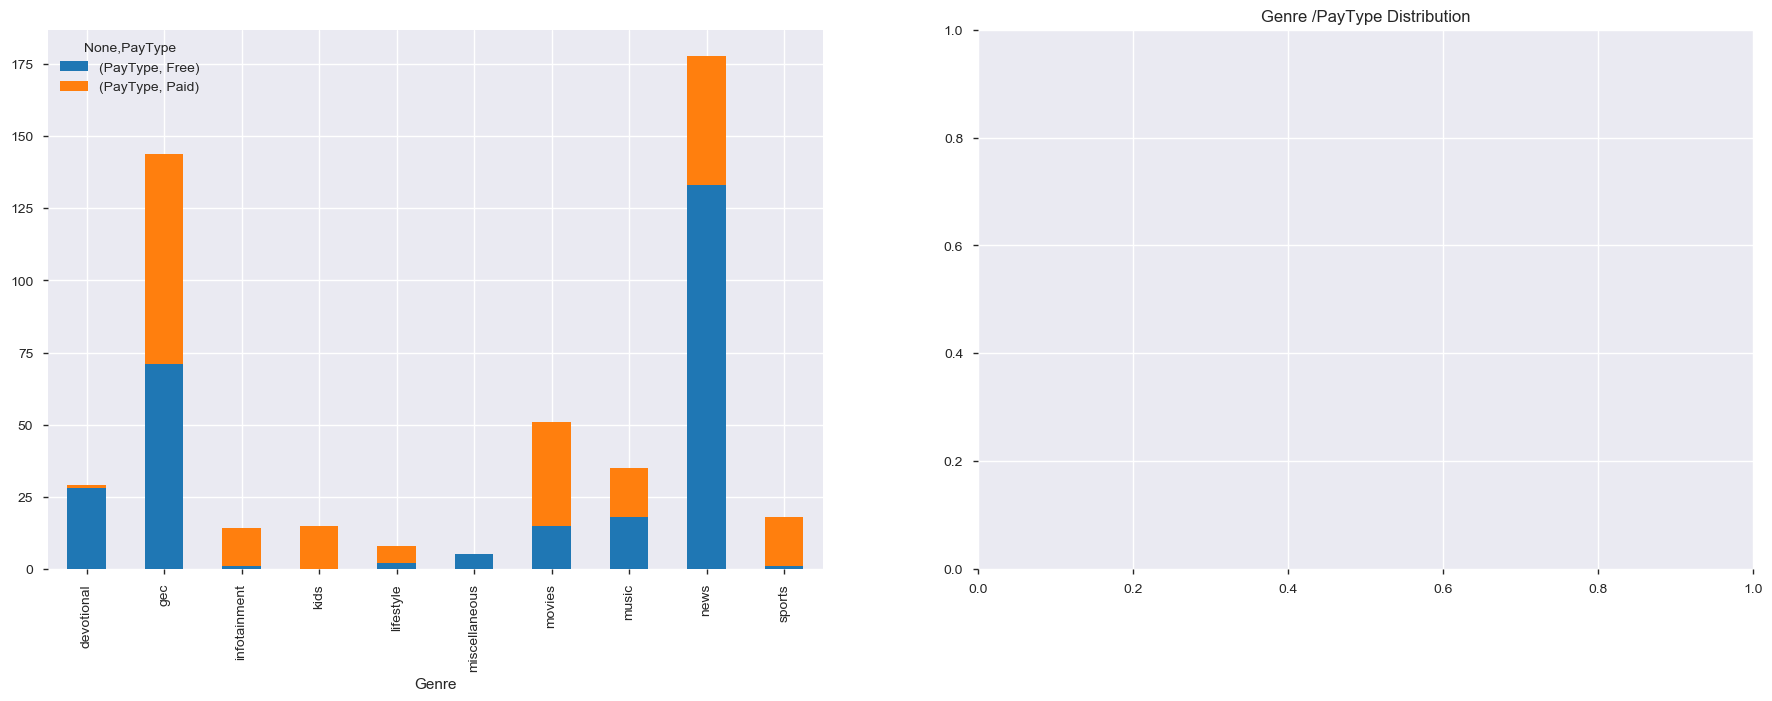

In [21]:
f,ax = plt.subplots(1,2,figsize=(22,7))

dfTemp =df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']

dfTemp =dfTemp[dfTemp['Region']!='S']
dfStack = dfTemp.groupby(['Genre','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(ax=ax[0],stacked=True)
ax[1].set_title('Genre /PayType Distribution')



Text(0.5, 1.0, 'Pie Plot- Paid - Genre Distribution')

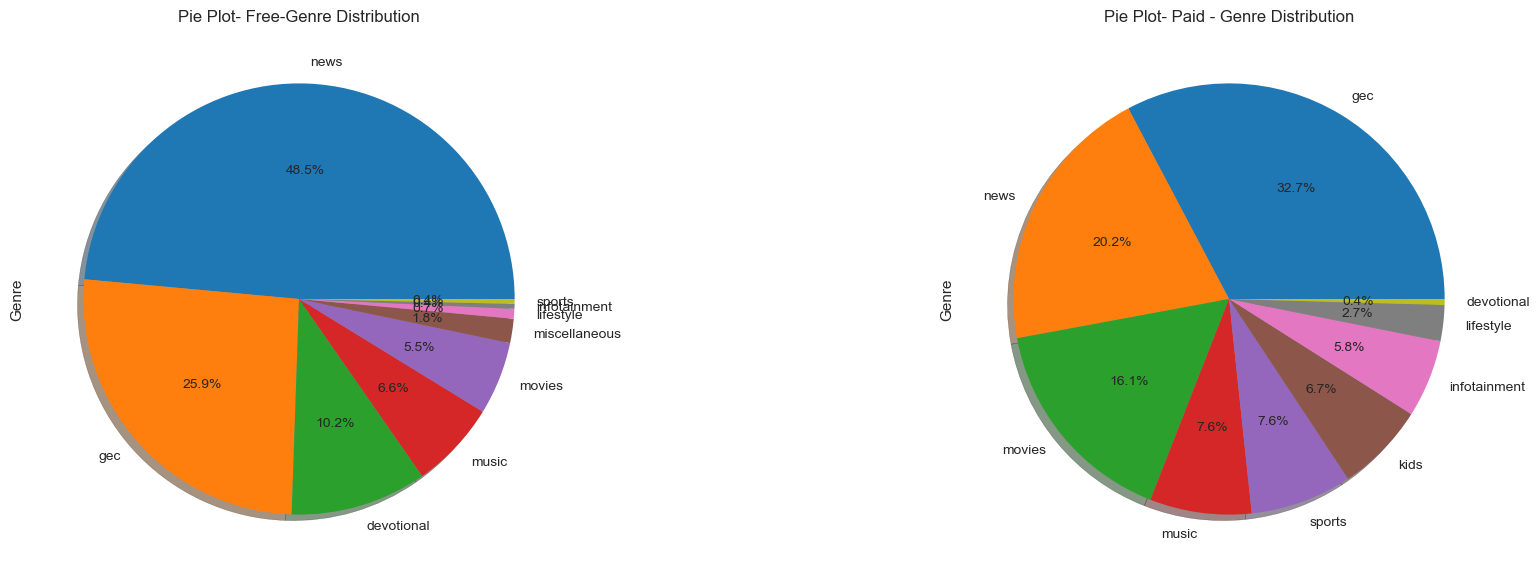

In [22]:
f,ax = plt.subplots(1,2,figsize=(22,7))

dfTemp = df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp = dfTemp[dfTemp['Genre']!='na']
dfTemp = dfTemp[dfTemp['PayType']=='Free']
dfTemp['Genre'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie Plot- Free-Genre Distribution')

dfTemp = df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp = dfTemp[dfTemp['Genre']!='na']
dfTemp = dfTemp[dfTemp['PayType']=='Paid']
dfTemp['Genre'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Pie Plot- Paid - Genre Distribution')

Notice that 274 channel are FREE and Paid is 224 channels. The difference is due to HD channels being offered more in Paid.

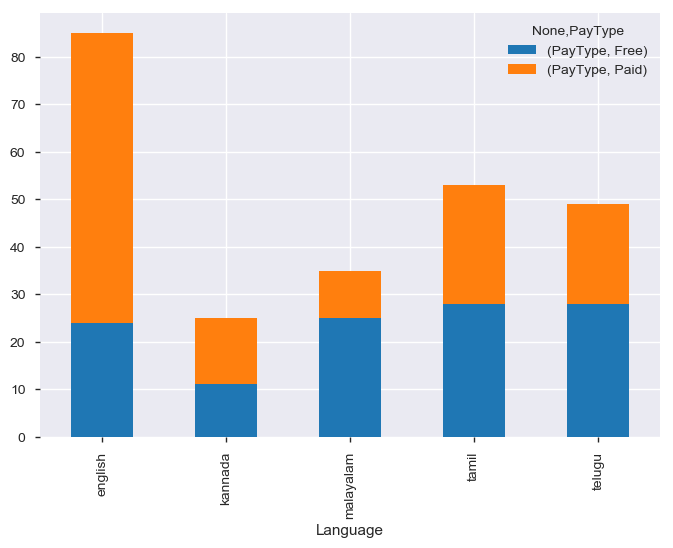

In [23]:
dfTemp =df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']

dfTemp =dfTemp[dfTemp['Region']=='South']
dfStack = dfTemp.groupby(['Language','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(stacked=True)

Text(0.5, 1.0, 'Telugu-Free')

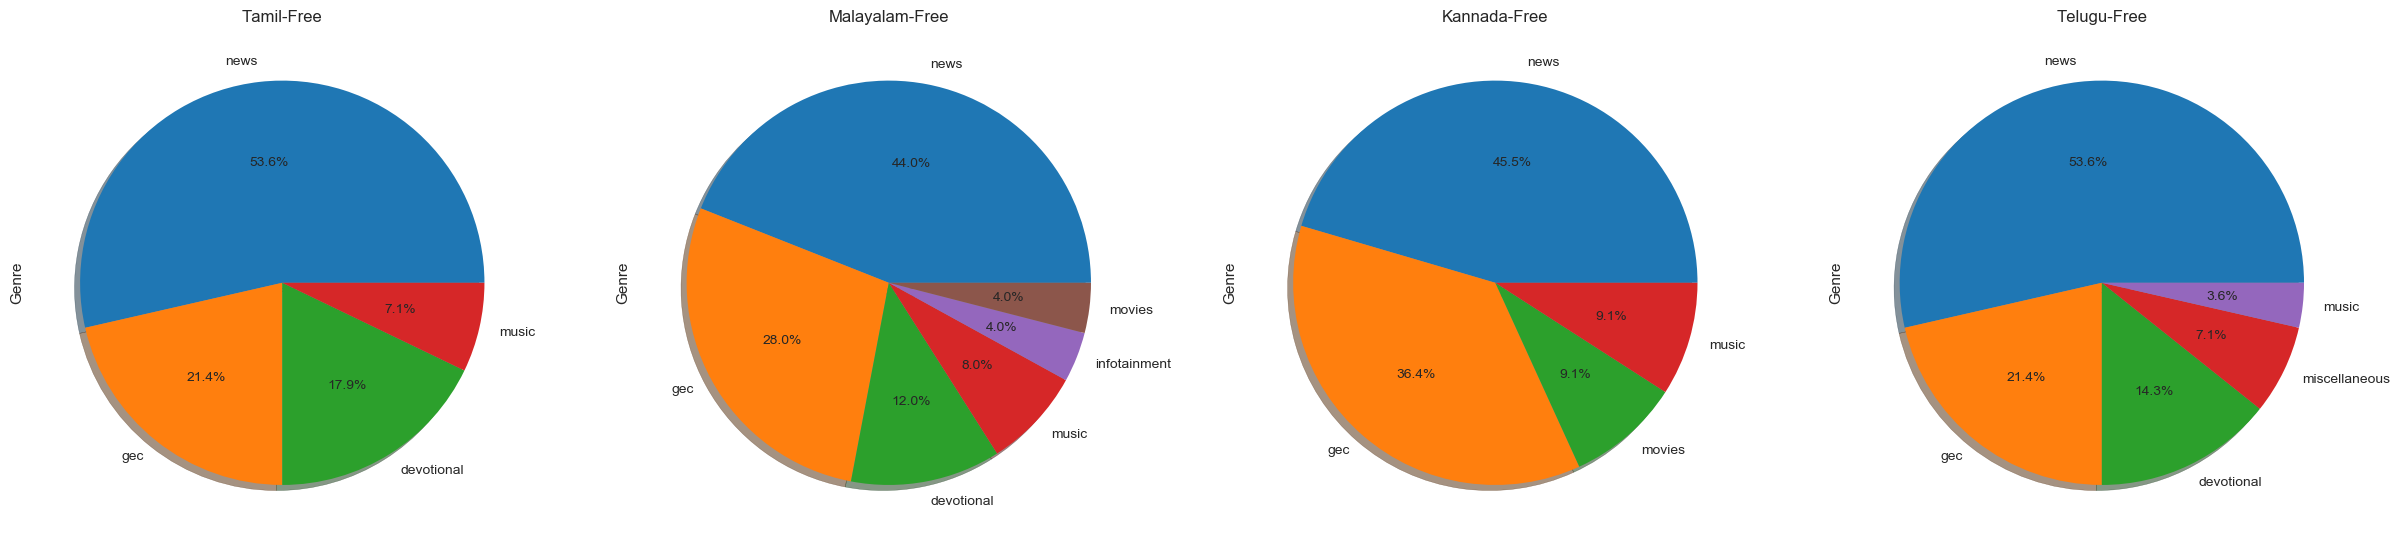

In [24]:
f,ax = plt.subplots(1,4,figsize=(30,7))

dfTemp =df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']
dfTemp =dfTemp[dfTemp['Region']=='South']
dfTemp =dfTemp[dfTemp['PayType']=='Free']
#explode=[0,0.1,0.1,0.1,0.1,0.1],
dfTemp['Genre'][dfTemp['Language'] == 'tamil'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Tamil-Free')

dfTemp['Genre'][dfTemp['Language'] == 'malayalam'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Malayalam-Free')
dfTemp['Genre'][dfTemp['Language'] == 'kannada'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[2].set_title('Kannada-Free')
dfTemp['Genre'][dfTemp['Language'] == 'telugu'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[3].set_title('Telugu-Free')
#dfTemp['Genre'][dfTemp['Language'] == 'english'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[4],shadow=True)
#ax[4].set_title('English-Free')


From the above below are key observations for Free(For South Region excluding english):
- There are no channels for Kids 
- It is interesting to note that malayalam language has most to offer(all except kids,sports and lifestyle) followed by Telugu(all except kids,movies,infotainment, sports and lifestyle).
- News, GEC and Devotional were the top 3 categories for Tamil, Malayalam and Telugu language.

Text(0.5, 1.0, 'Telugu-Paid')

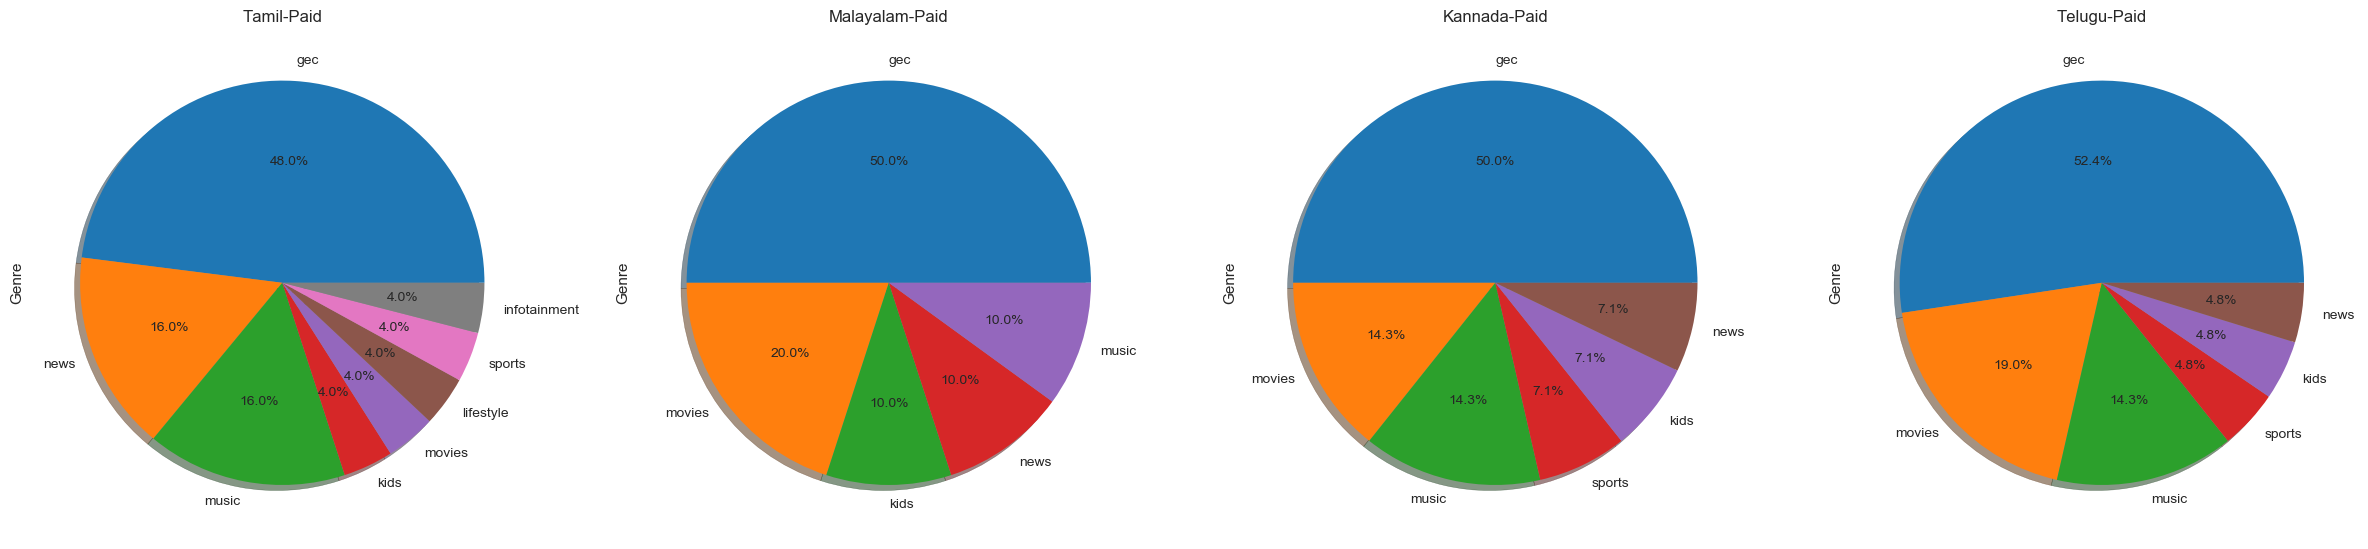

In [25]:
f,ax = plt.subplots(1,4,figsize=(30,7))

dfTemp =df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']
dfTemp =dfTemp[dfTemp['Region']=='South']
dfTemp =dfTemp[dfTemp['Language']!='english']
dfTemp =dfTemp[dfTemp['PayType']=='Paid']
#explode=[0,0.1,0.1,0.1,0.1,0.1],
dfTemp['Genre'][dfTemp['Language'] == 'tamil'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Tamil-Paid')

dfTemp['Genre'][dfTemp['Language'] == 'malayalam'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Malayalam-Paid')
dfTemp['Genre'][dfTemp['Language'] == 'kannada'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[2].set_title('Kannada-Paid')
dfTemp['Genre'][dfTemp['Language'] == 'telugu'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[3].set_title('Telugu-Paid')
#dfTemp['Genre'][dfTemp['Language'] == 'english'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[4],shadow=True)
#ax[4].set_title('English-Paid')


From the above below are key observations for Paid (For South Region excluding english):
- There are no channels for Devotional 
- Tamil language has the most offerings under genre(all except devotional), Next was Telugu and Kannada language(all except infotainment and lifestyle) followed by Malayalam(all except infotainment, sports and lifestyle).
- GEC, Music and Movies were the top 3 categories for Malayalam, Kannada and Telugu language.

<a id=section402></a>

### 4.2 What are the offerings under Paid?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Cost distribution using FacetGrid')

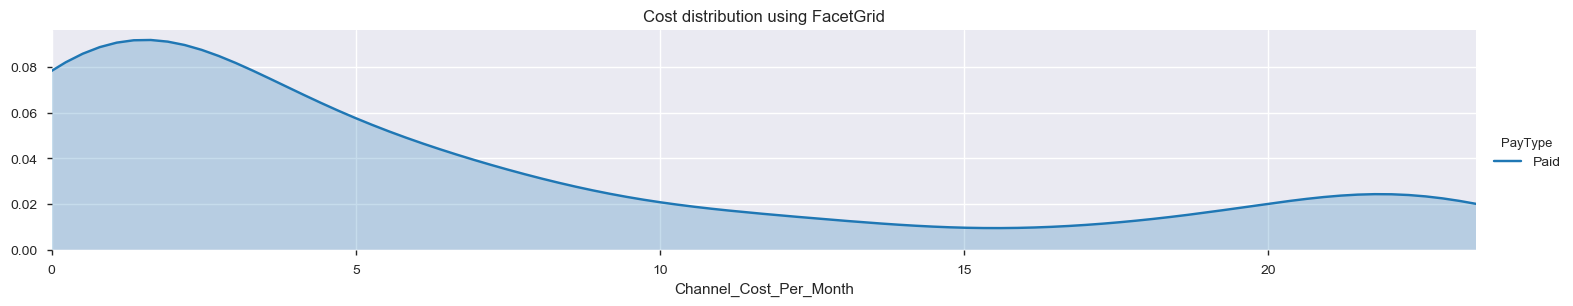

In [26]:
dfTemp = df_myPackData[df_myPackData['Channel_Cost_Per_Month']<100]
dfTemp = dfTemp[dfTemp['Ch_Type']=='SD']
dfTemp = dfTemp[dfTemp['PayType']=='Paid']

as_fig = sns.FacetGrid(dfTemp,hue='PayType',aspect=5)

as_fig.map(sns.kdeplot,'Channel_Cost_Per_Month',shade=True)

oldest = dfTemp['Channel_Cost_Per_Month'].max()

as_fig.set(xlim=(0,oldest+1))

as_fig.add_legend()
plt.title('Cost distribution using FacetGrid')

- In Paid Channels List Majority of channels are in 0-8 Rs cost category.
- The next bracket comes in the cost of Rs 19-22. 

Using groupby

From the above its little difficult to absorb information quickly by looking at numbers.Therefore we will make use of other plots to get clear vision.

In [27]:
dfTemp = df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp = dfTemp[dfTemp['PayCat']!='F-NCF'] #removing the Network Fee as this is mandatory
dfTemp.groupby(['PayCat','PayType'])['PayCat'].count()

PayCat              PayType
A-Free              Free       274
B-(0-3)Low          Paid       106
C-(3-8)Moderate     Paid        53
D-(8-15)High        Paid        25
E-(15-30)Very High  Paid        39
Name: PayCat, dtype: int64

- Using catplot bar graph to see the frequency distribution of paid channels

Text(0.5, 1.0, 'Factor plot for Pay Category and Pay Type')

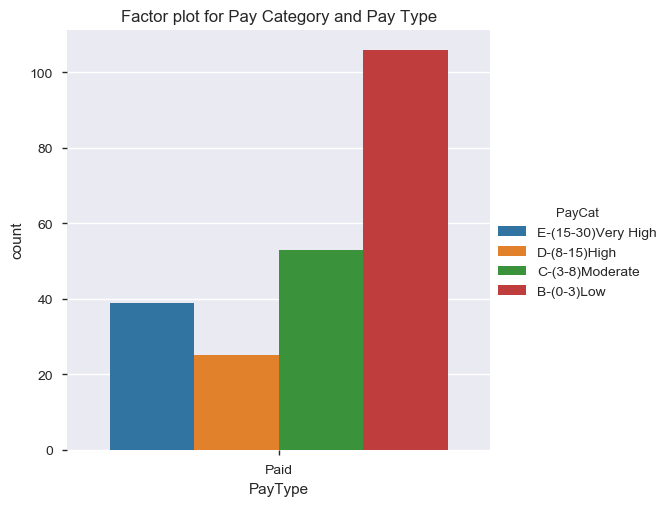

In [28]:
dfTemp =df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp = dfTemp[dfTemp['PayType']=='Paid']
dfTemp = dfTemp[dfTemp['PayCat']!='F-NCF']
sns.catplot('PayType', hue='PayCat', kind='count', data=dfTemp);
plt.title('Factor plot for Pay Category and Pay Type')

- Majority of them are in 0-3(Low) and 3-8(Moderate) Range(106+53=159).
- A good chunk is available in the Very High(15-30) range also(39).

### 4.3 What trends are observed in the Sample data for Free and Paid channels ?

Lets anlayse how the users veiewership(actuals) is divided under Genre what are the most preferred and which are the least from a sample of 5 users

In [29]:

def ReadLiveUserDataWishList(pd, Datafilename='',MonthlyNetworkFee=153.40,Ch_Type='SD',FilterQuery='KeepYesSD'):
    
    # Load spreadsheet
    xl = pd.ExcelFile(Datafilename)
    Email_IDs ='NEP'
    #set the custom columnnames that you want to use while parsing
    columnNames=['Channel_Name','Channel_Value','Channel_Cost_Per_Month','Chosen','Genre','Language','Ch_Type','User_Name']
        
    #**Fetch & Store the data of MyPack in a new Data frame df_myCurrentPack Begin Code***
    df_LiveUserDataPack = pd.DataFrame([],columns=columnNames)
    
    # Get all the sheet names which has myCurrent Pack and other Packs to compare cost
    for sheetname in xl.sheet_names :
        # Load a sheet into a DataFrame by name: 
        if sheetname.lower() == 'mypack' :
            #df_myCurrentPack = xl.parse(sheetname,names=columnNames)
            dftemp = pd.DataFrame([],columns=columnNames)
            dftemp = xl.parse(sheetname,names=columnNames)
            df_LiveUserDataPack = df_LiveUserDataPack.append(dftemp)
    #**Fetch & Store the data of MyPack in a new Data frame df_myCurrentPack and the Packs in df_OtherAvailablePacks End Code***

    #********Clean up the data for spaces from the 2 dataframes Begin Code*******************************
    
    df_LiveUserDataPack['Channel_Name'] = df_LiveUserDataPack['Channel_Name'].str.strip() #remove spaces
    df_LiveUserDataPack['Channel_Name'] = df_LiveUserDataPack['Channel_Name'].str.lower() #convert to lower cases all the channels
    df_LiveUserDataPack['Genre']        = df_LiveUserDataPack['Genre'].str.strip()               #remove spaces
    df_LiveUserDataPack['Genre']        = df_LiveUserDataPack['Genre'].str.lower()               #convert to lower cases all the channels
    df_LiveUserDataPack['Language']     = df_LiveUserDataPack['Language'].str.strip()         #remove spaces
    df_LiveUserDataPack['Language']     = df_LiveUserDataPack['Language'].str.lower()         #convert to lower cases all the channels
    df_LiveUserDataPack['Ch_Type']      = df_LiveUserDataPack['Ch_Type'].str.strip()           #remove spaces
 
    df_LiveUserDataPack['Pack_Name1']    = 'Alacarte'
    df_LiveUserDataPack['Broadcaster_x'] = 'Alacarte'
    df_LiveUserDataPack['Send_EmailTo']  = Email_IDs
    
    #Filter columns only Channel Name, Pack_Name and its monthly cost
    df_LiveUserDataPack = df_LiveUserDataPack.filter(items=['Channel_Name','Channel_Cost_Per_Month','Chosen',
                                                            'Send_EmailTo','Genre','Language','Ch_Type','User_Name'])
    
    #Filter only Pack_Names which have cost greater than 0
    if FilterQuery =='KeepYesSD' :
        #df_myCurrentPack = df_myCurrentPack.query("Channel_Cost_Per_Month>0 and Chosen=='Yes' and Ch_Type=='" + Ch_Type +"'")
        df_LiveUserDataPack = df_LiveUserDataPack.query("Chosen=='Yes' and Ch_Type=='SD'")
    elif FilterQuery =='KeepYes' :
        df_LiveUserDataPack = df_LiveUserDataPack.query("Chosen=='Yes'")
    
    
    #after filtering for cost>0 and choosen = yes drop any duplicates
    df_LiveUserDataPack = df_LiveUserDataPack.sort_values(by=['User_Name','Channel_Name'],ascending=[True,True])
    df_LiveUserDataPack = df_LiveUserDataPack.drop_duplicates(keep='first')
    df_LiveUserDataPack = df_LiveUserDataPack.reset_index(drop=True)
    
    #print("after dropping duplicates ={}".format(df_myCurrentPack['Channel_Name'].count()))
    
    #********Clean up the data for spaces from the 2 dataframes End Code*******************************
    return df_LiveUserDataPack

osObj.chdir(Configurator.PyPackProgPath)

Datafilename = 'Package_LiveUsers_WishListData_ver3.xlsx'
ExcelFileName = Datafilename[Datafilename.rfind("\\")+1:] 
CurrDirectory = osObj.getcwd()

ServiceProviderName = 'TataSky'
SPPackfilename = osObj.path.join(CurrDirectory, ExcelFileName)


print("*****Reading Live User data Started****")
#Read the Wsihlist and email id details for the user provided in MyPack and MyEmail worksheet
df_LiveUserData = ReadLiveUserDataWishList(pd,Datafilename=SPPackfilename,
                                          MonthlyNetworkFee=Configurator.MonthlyNetworkFee,
                                          FilterQuery='KeepYes')
df_LiveUserData['PayCat'] = df_LiveUserData['Channel_Cost_Per_Month'].apply(compute_pay_category)

df_LiveUserData = df_LiveUserData.filter(items=['Channel_Name','Channel_Cost_Per_Month','Chosen','Send_EmailTo',
                                                  'Genre','Language','Ch_Type','PayCat','User_Name'])

print("****Reading Live User data completed..." + Datafilename)


*****Reading Live User data Started****
****Reading Live User data completed...Package_LiveUsers_WishListData_ver3.xlsx


First let us see the Free Vs Paid distribution 

In [30]:
df_LiveUserData['PayType'] = df_LiveUserData.apply(lambda x: 'Free' if x['Channel_Cost_Per_Month'] ==0 else 'Paid',axis=1)
df_LiveUserData =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
df_LU_PayFreeBreakUp = df_LiveUserData.groupby('PayType').count()
#print(df_LU_PayFreeBreakUp['Channel_Name'].tolist())
print(df_LU_PayFreeBreakUp['Channel_Name'])
#print(df_LU_PayFreeBreakUp['Channel_Name'].index.values)


PayType
Free    155
Paid    222
Name: Channel_Name, dtype: int64


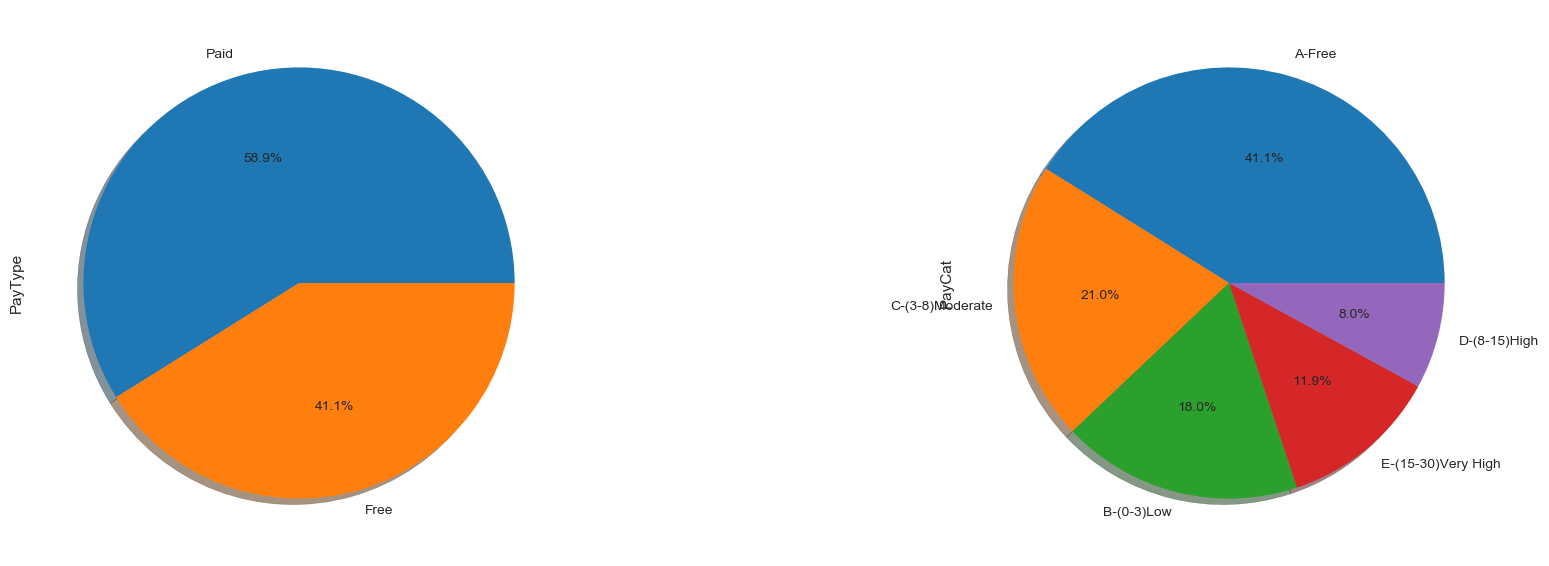

In [31]:
f,ax = plt.subplots(1,2,figsize=(22,7))

dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp['PayType'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
dfTemp['PayCat'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)


What is the distribution of Free Vs Paid for the sample users?

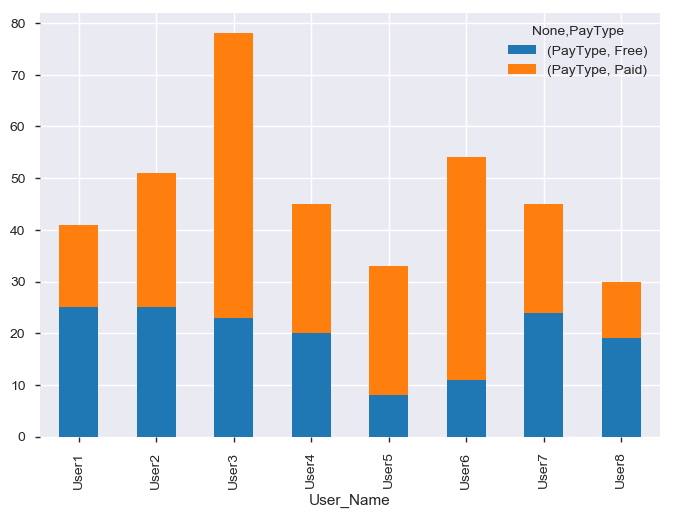

In [32]:
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']

dfStack =dfTemp[dfTemp['User_Name']!='U']
dfStack = dfStack.groupby(['User_Name','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(stacked=True)

Text(0.5, 1.0, 'Total Cost for Paid Channel')

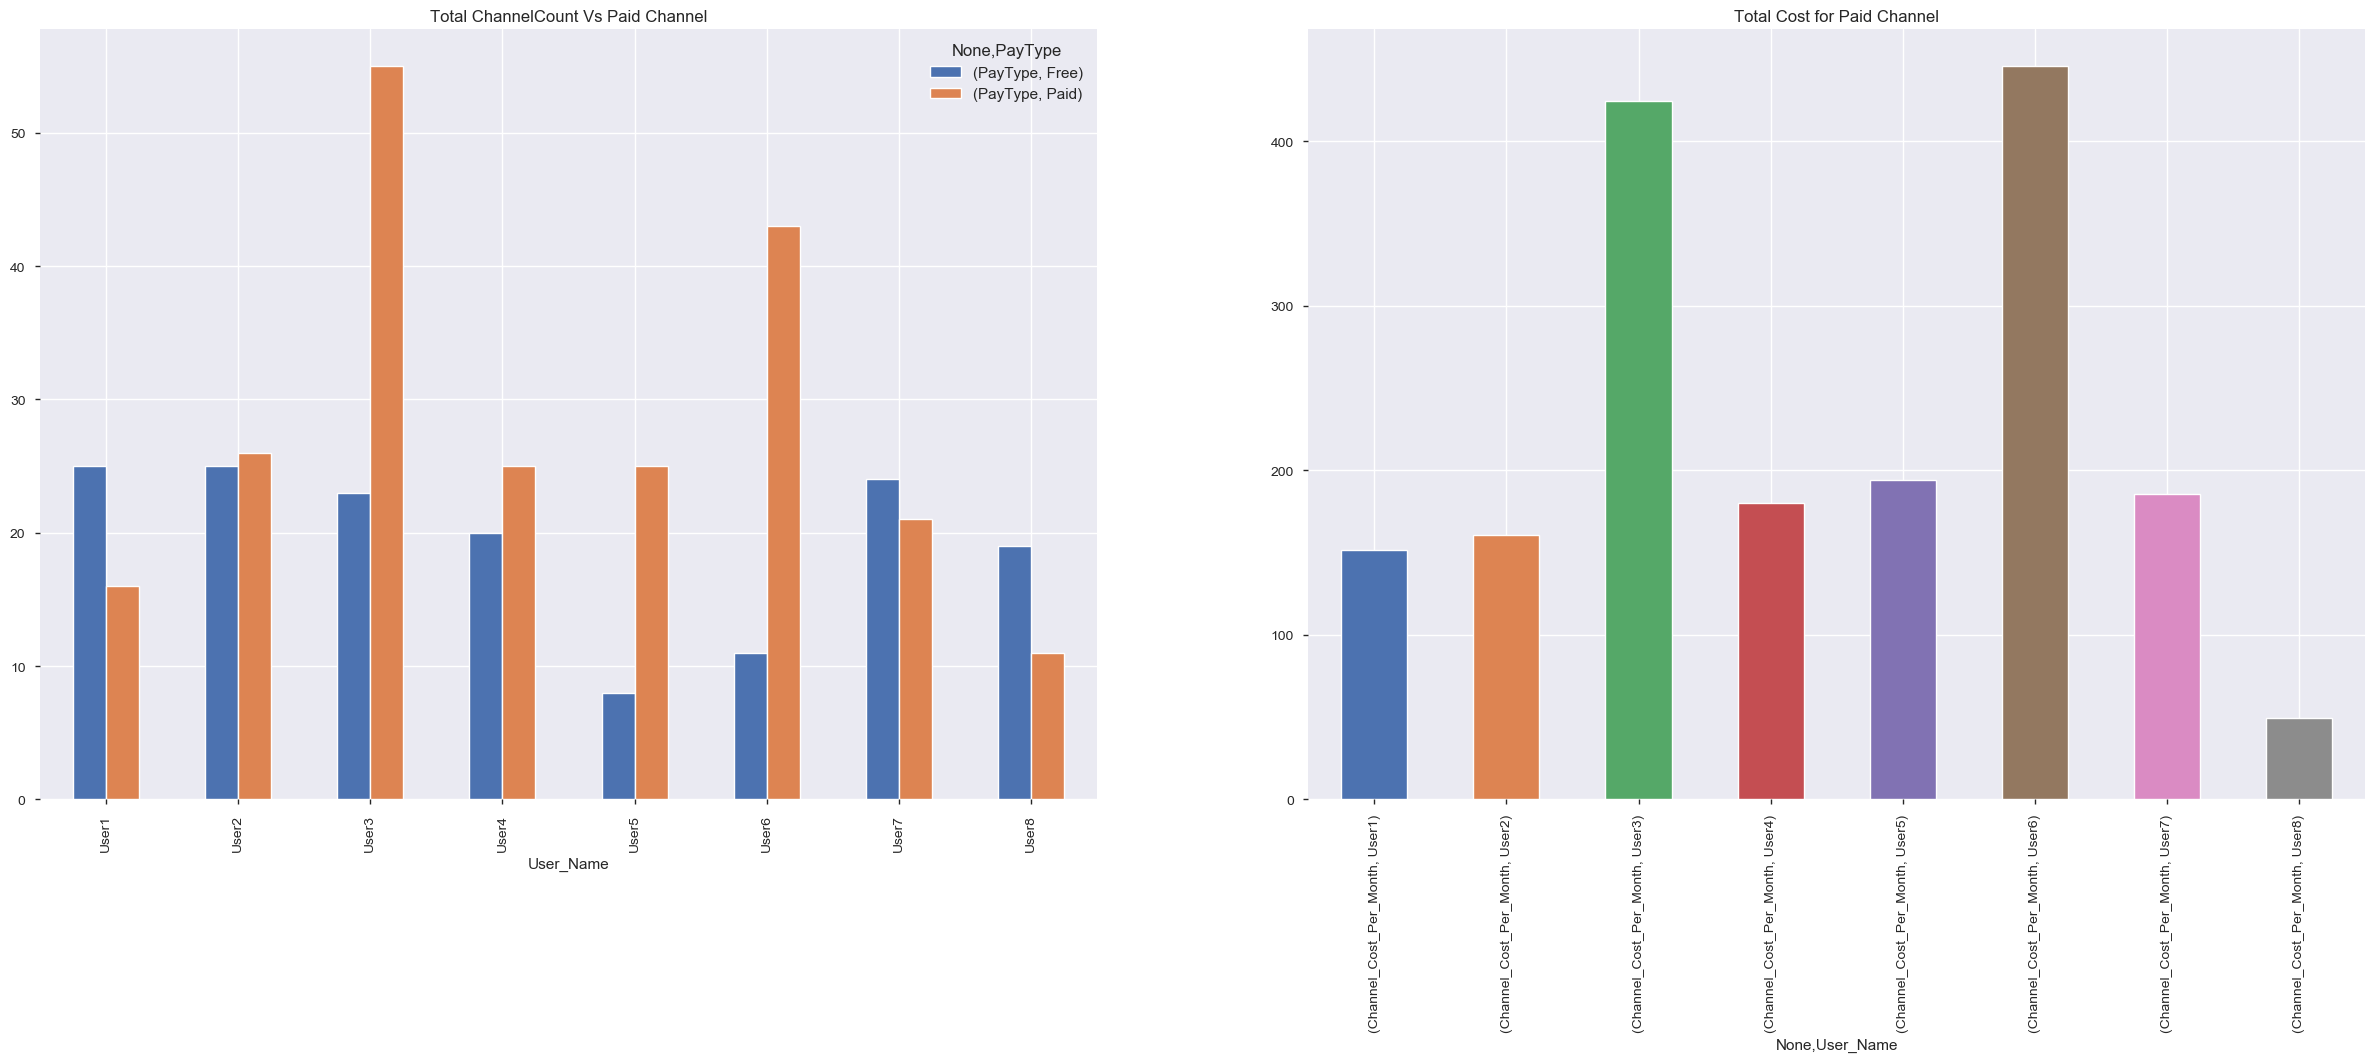

In [33]:
f,ax = plt.subplots(1,2,figsize=(30,10))
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp = dfTemp[dfTemp['PayCat']!='F-NCF']

#pd.pivot_table(dfTemp,index=["User_Name"],values=["Channel_Cost_Per_Month"],aggfunc=np.sum)
sns.set()
#pd.pivot_table(dfTemp,index=["User_Name"],values=["Channel_Name","Channel_Cost_Per_Month"],
#               aggfunc={'Channel_Name' : "count" , 
#                        'Channel_Cost_Per_Month' :np.count_nonzero}).plot.bar(ax=ax[0])

dfStack = dfTemp.groupby(['User_Name','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(ax=ax[0])

ax[0].set_title('Total ChannelCount Vs Paid Channel')

#pd.pivot_table(dfTemp,index=["User_Name"],values=["Channel_Cost_Per_Month"],
#               aggfunc={'Channel_Cost_Per_Month' : np.sum}).plot.bar(ax=ax[1])
dfStack = dfTemp.groupby(['User_Name']).agg({'Channel_Cost_Per_Month':np.sum})

dfStack = dfStack.unstack()
dfStack.plot.bar(ax=ax[1])
ax[1].set_title('Total Cost for Paid Channel')

From the above we see that, 
- The user 1 2 and 4 shows equal distribution of Free and Paid channels. 
- The User 3 and User 5 and 6 has lesser Free channels and more Paid.


Also, the cost range of the 6 users is varying from 151.64 to 445.80.
- The relation between count of channels can be seen, higher the paid channels count higher the price.
- for an equal mix of paid vs free we see the cost is between(160 to 180).
- The total count of channels are close to TRAI's recommendation of 50 channels except for user3(which is on higher side 77).
- for user6 the higher mix of paid channels attributed to the higher base cost.


Now, let us dig and see what are the offerings under Genre to get into the choices of the user

Text(0.5, 1.0, 'Genre (User3)')

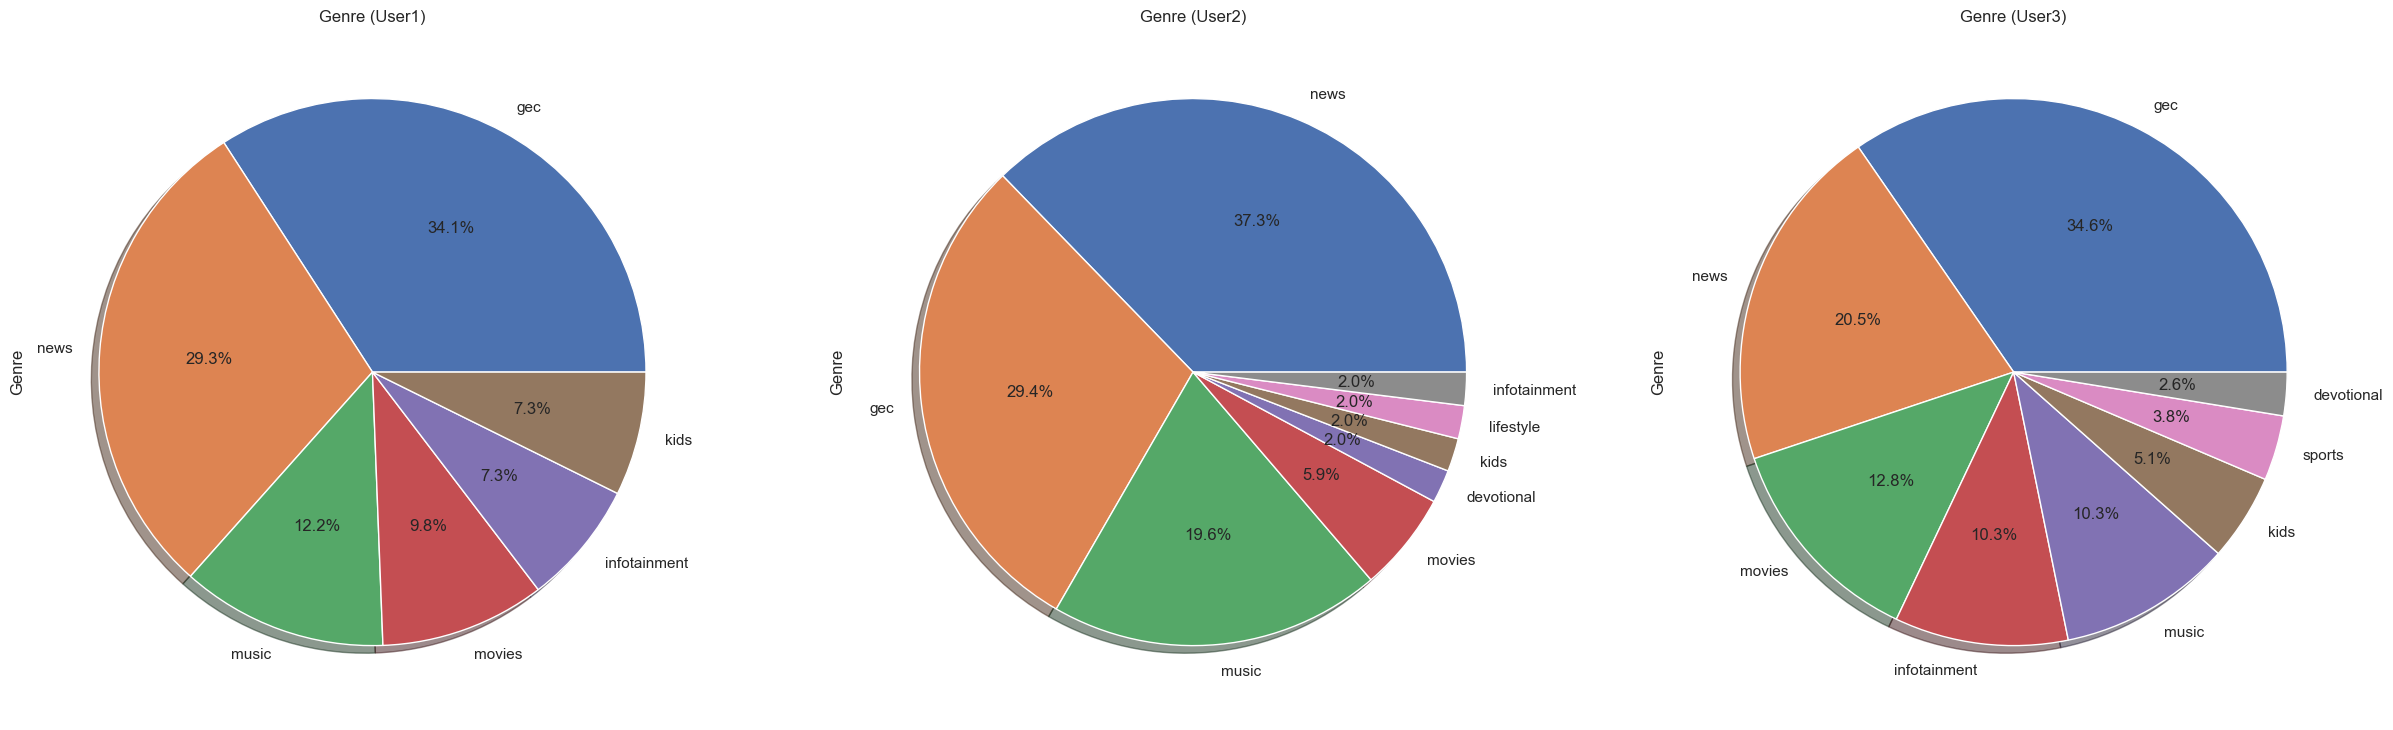

In [34]:
f,ax = plt.subplots(1,3,figsize=(30,10))
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']

dfTemp['Genre'][dfTemp['User_Name'] == 'User1'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
dfTemp['Genre'][dfTemp['User_Name'] == 'User2'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
dfTemp['Genre'][dfTemp['User_Name'] == 'User3'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)

ax[0].set_title('Genre (User1)')
ax[1].set_title('Genre (User2)')
ax[2].set_title('Genre (User3)')


Text(0.5, 1.0, 'Genre (User6)')

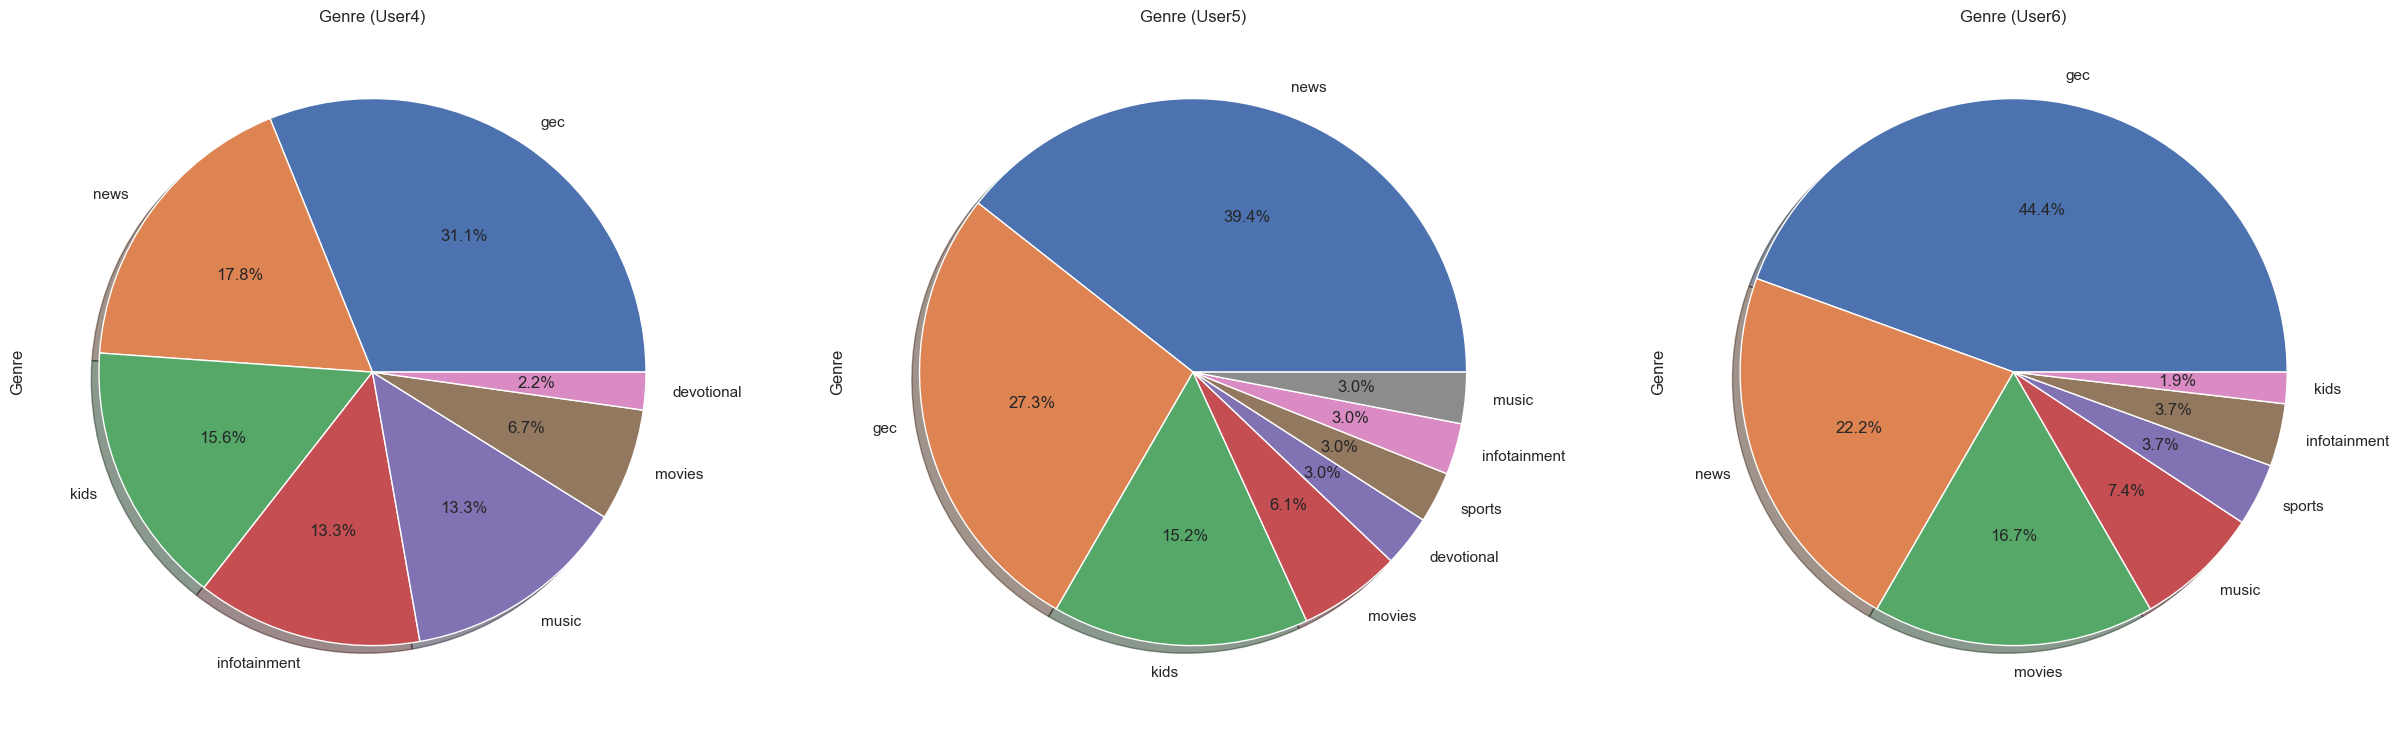

In [35]:
f,ax = plt.subplots(1,3,figsize=(30,10))
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']

dfTemp['Genre'][dfTemp['User_Name'] == 'User4'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
dfTemp['Genre'][dfTemp['User_Name'] == 'User5'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
dfTemp['Genre'][dfTemp['User_Name'] == 'User6'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)

ax[0].set_title('Genre (User4)')
ax[1].set_title('Genre (User5)')
ax[2].set_title('Genre (User6)')

Now, lets dig into the Genre category to see what is the distribution and how is data spread across free and paid for different genre.

Text(0.5, 1.0, 'Live User Genre (User3)')

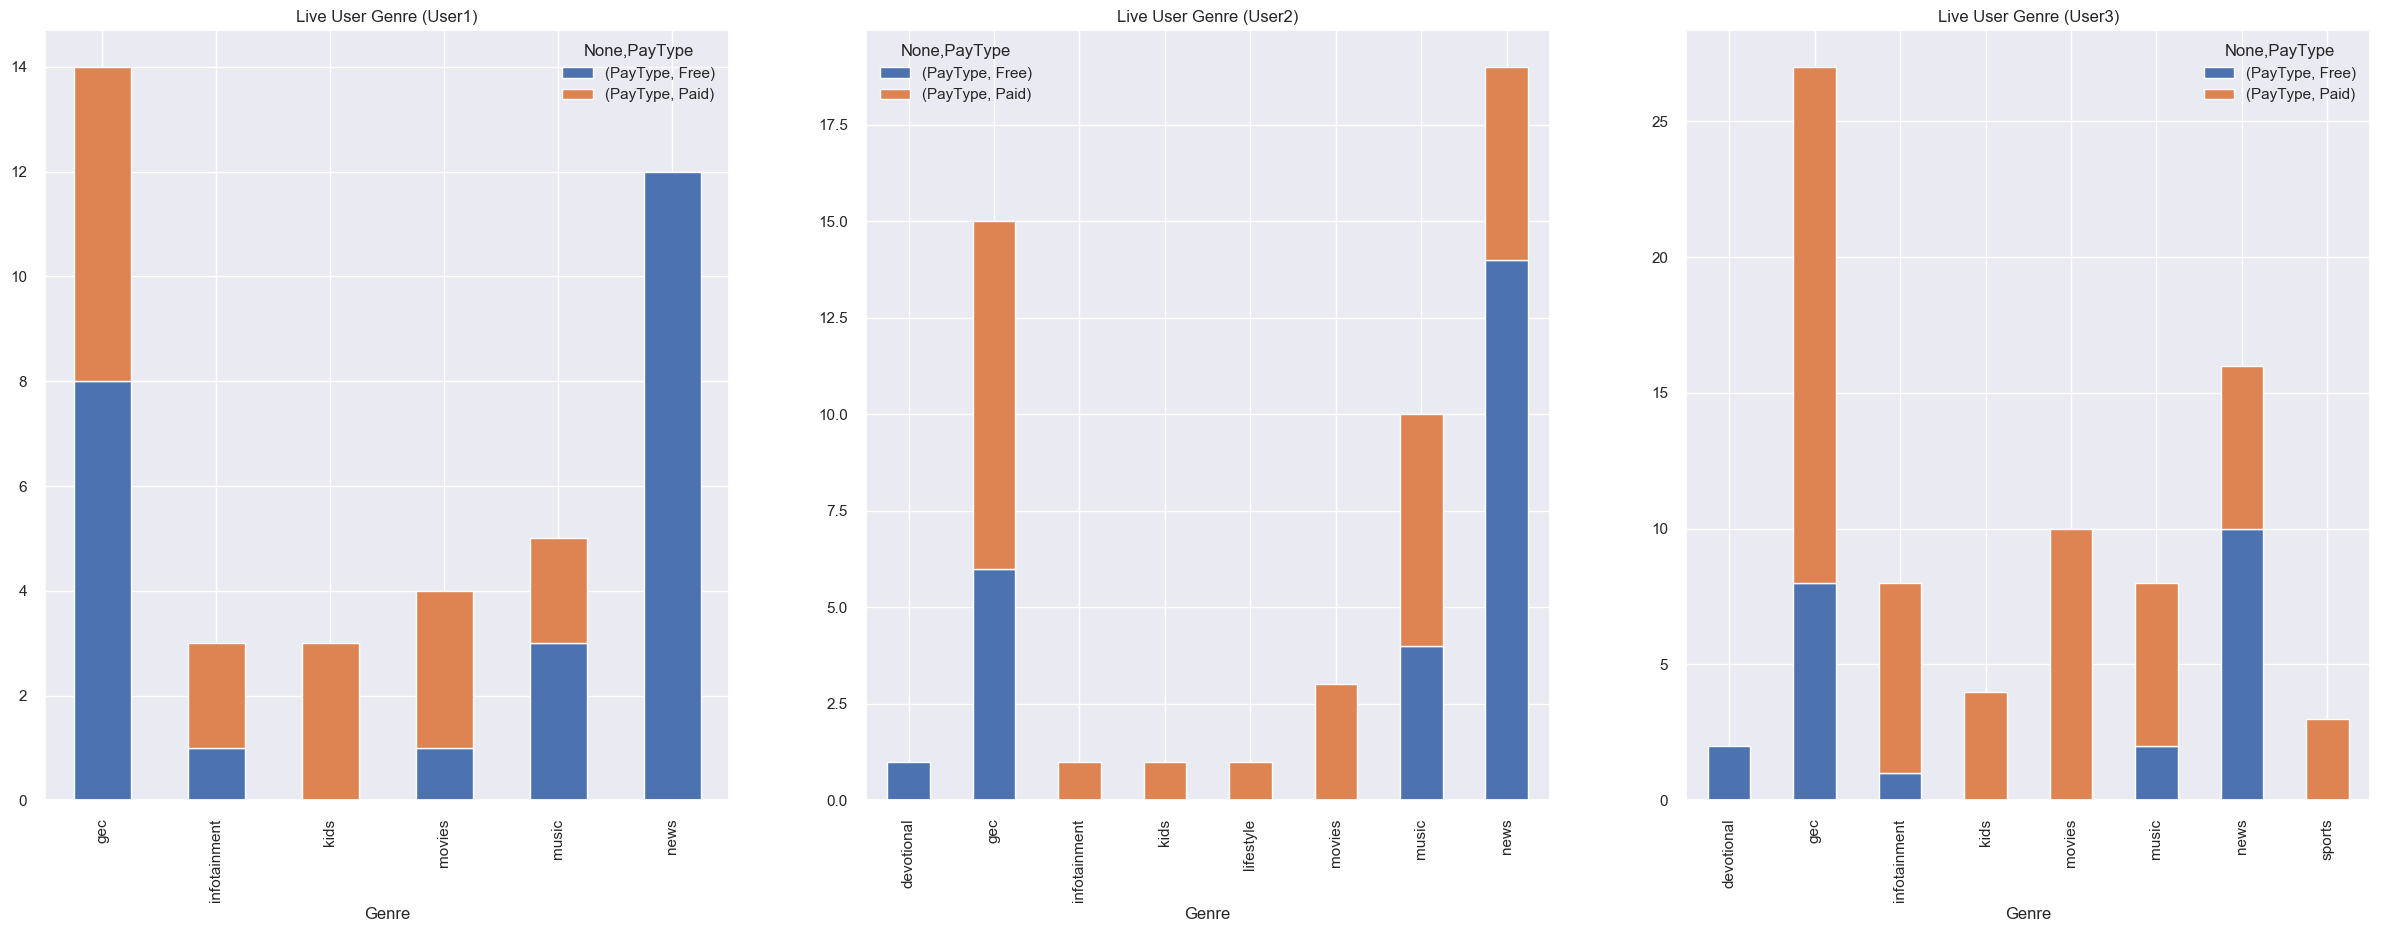

In [36]:
f,ax = plt.subplots(1,3,figsize=(30,10))
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']

dfTemp =dfTemp[dfTemp['Genre']!='na']
dfStack =dfTemp[dfTemp['User_Name']=='User1']
dfStack = dfStack.groupby(['Genre','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(ax=ax[0],stacked=True)

dfStack =dfTemp[dfTemp['User_Name']=='User2']
dfStack = dfStack.groupby(['Genre','PayType']).agg({'PayType':"count"})
dfStack = dfStack.unstack()
dfStack.plot.bar(ax=ax[1],stacked=True)

dfStack =dfTemp[dfTemp['User_Name']=='User3']
dfStack = dfStack.groupby(['Genre','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(ax=ax[2],stacked=True)

ax[0].set_title('Live User Genre (User1)')
ax[1].set_title('Live User Genre (User2)')
ax[2].set_title('Live User Genre (User3)')


Text(0.5, 1.0, 'Live User Genre (User6)')

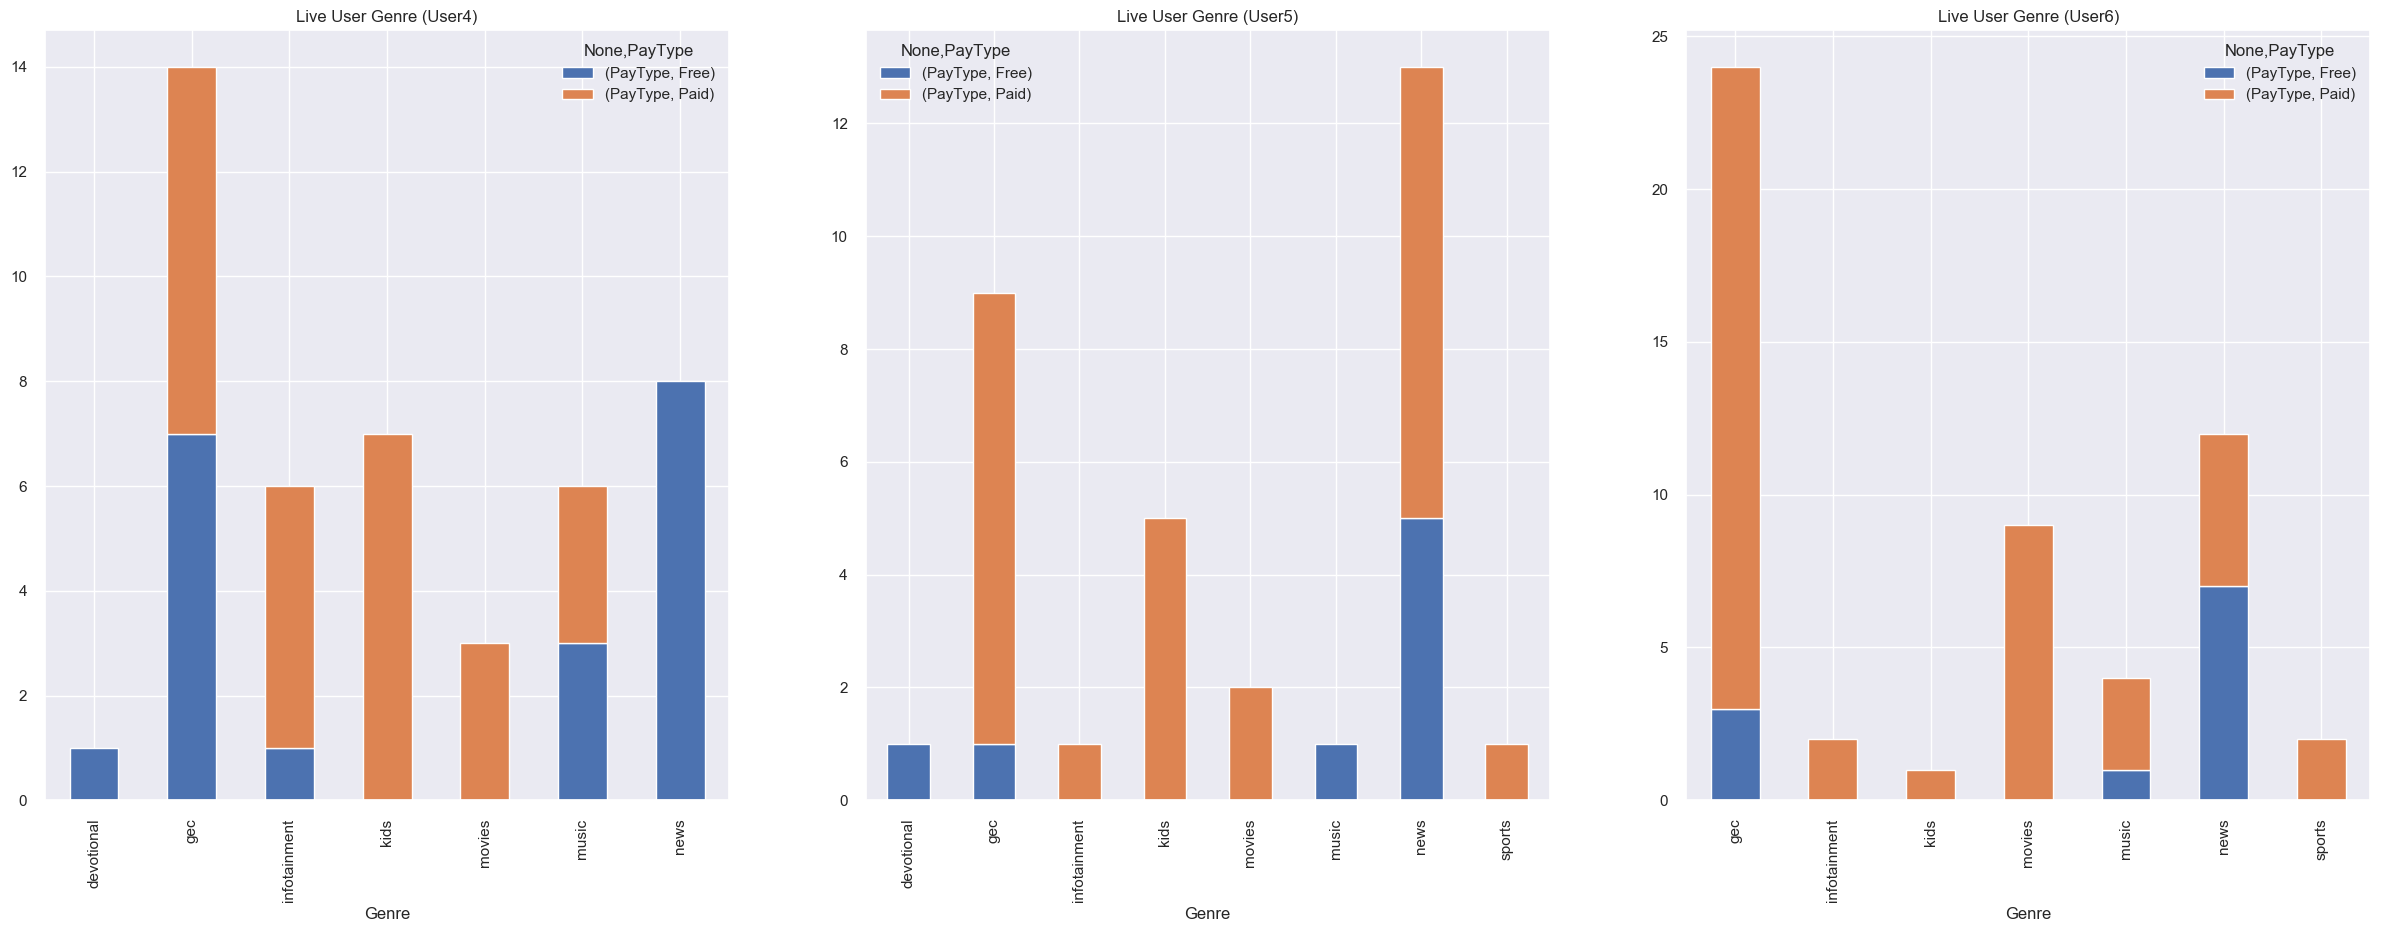

In [37]:
f,ax = plt.subplots(1,3,figsize=(30,10))
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']

dfTemp =dfTemp[dfTemp['Genre']!='na']
dfStack =dfTemp[dfTemp['User_Name']=='User4']
dfStack = dfStack.groupby(['Genre','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(ax=ax[0],stacked=True)

dfStack =dfTemp[dfTemp['User_Name']=='User5']
dfStack = dfStack.groupby(['Genre','PayType']).agg({'PayType':"count"})
dfStack = dfStack.unstack()
dfStack.plot.bar(ax=ax[1],stacked=True)

dfStack =dfTemp[dfTemp['User_Name']=='User6']
dfStack = dfStack.groupby(['Genre','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(ax=ax[2],stacked=True)

ax[0].set_title('Live User Genre (User4)')
ax[1].set_title('Live User Genre (User5)')
ax[2].set_title('Live User Genre (User6)')


From the above it is clear that the majority of the distribution is under GEC, Music, News, Movies and infotainment.Let us merge the data and see it as stack for the sample.

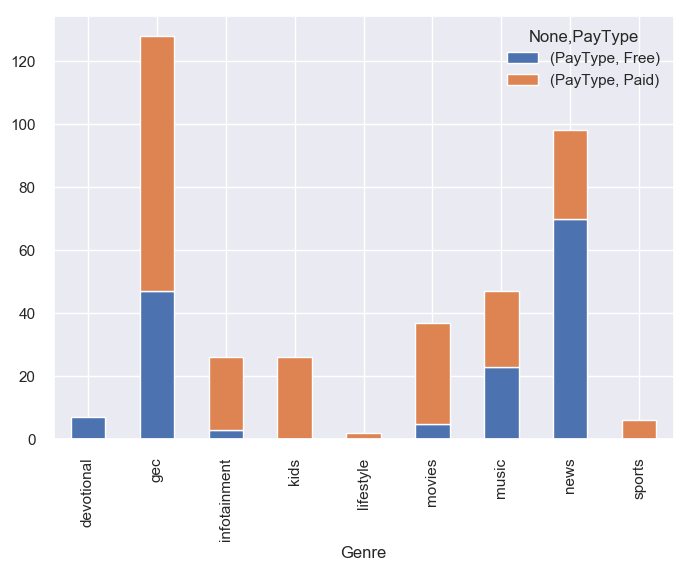

In [38]:
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']

dfStack =dfTemp[dfTemp['User_Name']!='U']
dfStack = dfStack.groupby(['Genre','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(stacked=True)

Text(0.5, 1.0, 'Live Genre (Paid - Frequency Distribution)')

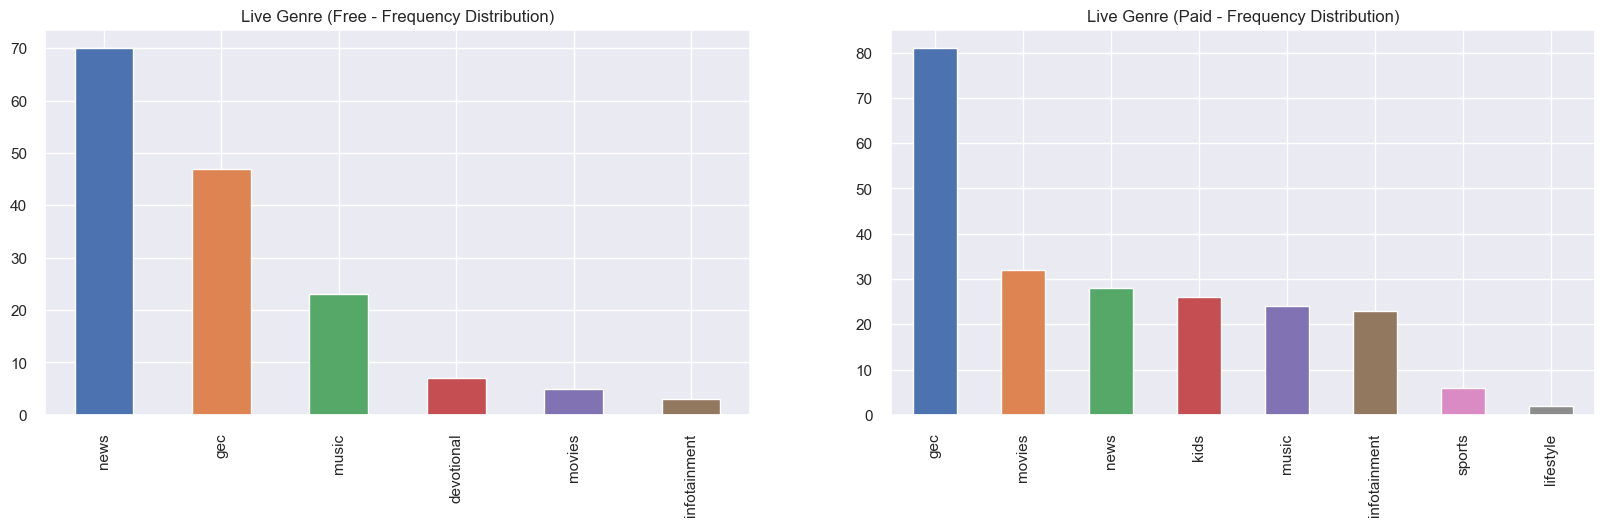

In [39]:
f,ax = plt.subplots(1,2,figsize=(20,5))
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']

#dfTemp['Genre'].value_counts().plot.pie()
dfTemp['Genre'][dfTemp['PayType'] == 'Free'].value_counts().plot.bar(ax=ax[0])
dfTemp['Genre'][dfTemp['PayType'] == 'Paid'].value_counts().plot.bar(ax=ax[1])
ax[0].set_title('Live Genre (Free - Frequency Distribution)')
ax[1].set_title('Live Genre (Paid - Frequency Distribution)')

Now let us see the percentage distribution for Paid and Free category as Bar & Pie plot.

Text(0.5, 1.0, 'Sample(All Users) -Genre (Paid - Frequency(%) Distribution)')

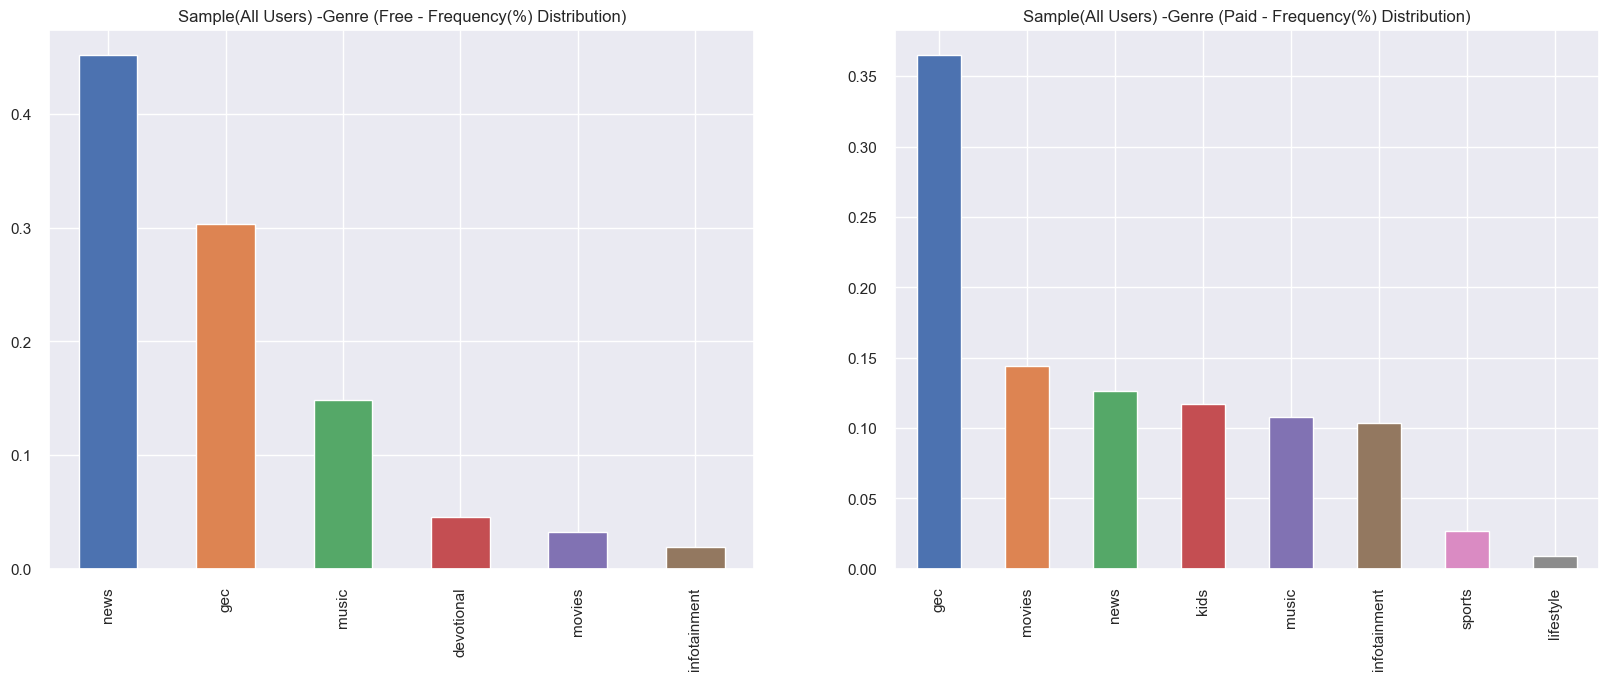

In [40]:
f,ax = plt.subplots(1,2,figsize=(20,7))
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']
(dfTemp[dfTemp.Channel_Cost_Per_Month ==0]['Genre'].value_counts()/
 len(dfTemp[dfTemp.Channel_Cost_Per_Month ==0])).plot.bar(ax=ax[0])
(dfTemp[dfTemp.Channel_Cost_Per_Month !=0]['Genre'].value_counts()/
 len(dfTemp[dfTemp.Channel_Cost_Per_Month !=0])).plot.bar(ax=ax[1])

ax[0].set_title('Sample(All Users) -Genre (Free - Frequency(%) Distribution)')
ax[1].set_title('Sample(All Users) -Genre (Paid - Frequency(%) Distribution)')

Text(0.5, 1.0, 'Live User Genre (Paid - Frequency(%) Distribution)')

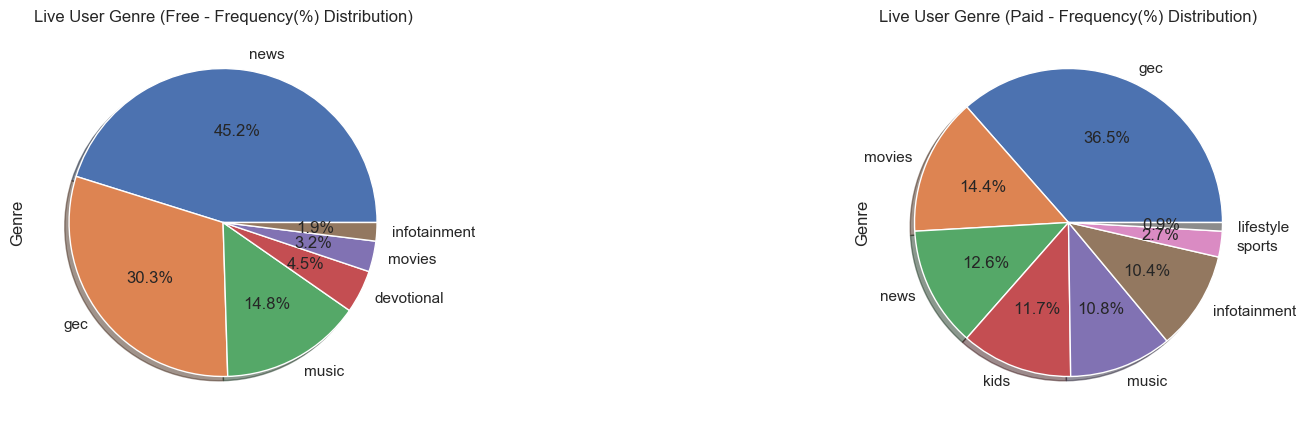

In [41]:
f,ax = plt.subplots(1,2,figsize=(20,5))
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']

#dfTemp['Genre'].value_counts().plot.pie()
dfTemp['Genre'][dfTemp['PayType'] == 'Free'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
dfTemp['Genre'][dfTemp['PayType'] == 'Paid'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Live User Genre (Free - Frequency(%) Distribution)')
ax[1].set_title('Live User Genre (Paid - Frequency(%) Distribution)')

From the above we see that the percentage distribution for Genre under the Paid category are as below,
-GEC          (36%)
-Movies       (14%)
-News         (13%)
-Music        (11%)
-Kids         (12%)
-Infotainment (10%)
-Sports       (3%)
-Lifestyle    (1%)

### 4.4 What trends are observed in the Sample data for Genre ?
Let us slice the data of Free Vs Paid using a doughnut and further slice the Data of Free into Genre to see which are the most watched channels.

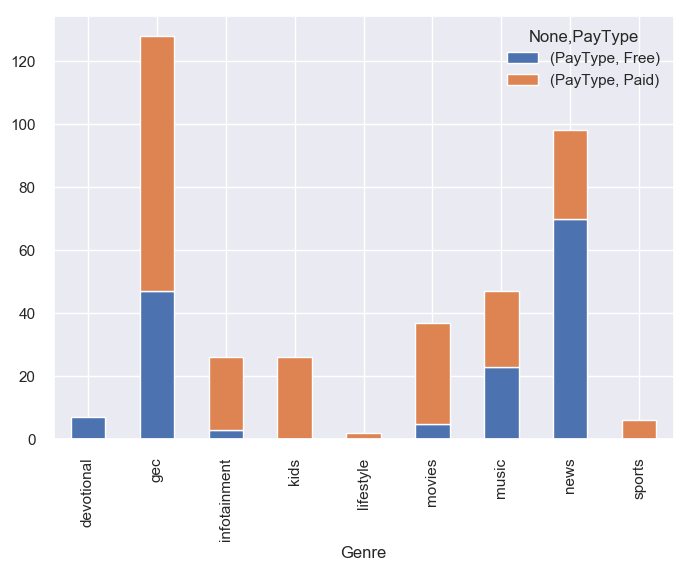

In [42]:
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']

dfStack =dfTemp[dfTemp['User_Name']!='U']
dfStack = dfStack.groupby(['Genre','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(stacked=True)

Plotting the doughnut using the above slicing information of Free and Paid

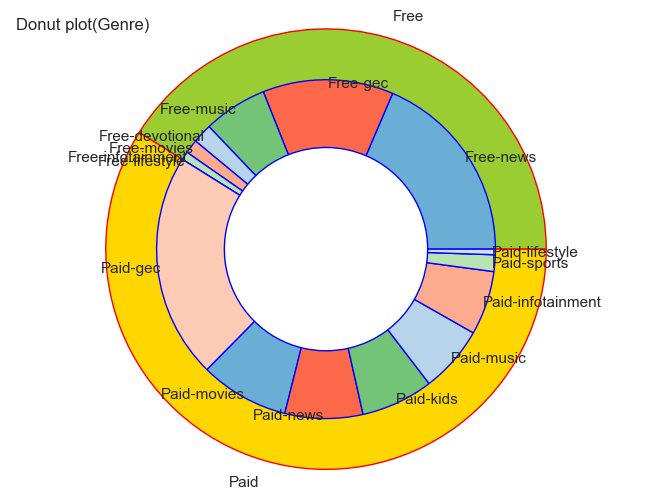

In [43]:
import matplotlib.pyplot as plt

dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
#dfTemp['Genre'].value_counts().plot.pie()
dfTempFree = dfTemp['Genre'][dfTemp['PayType'] == 'Free'].value_counts()
listFreeIndex = dfTempFree.index.values
listFreeValues = (dfTempFree.values)

#print(listFreeIndex)
dfTempPaid = dfTemp['Genre'][dfTemp['PayType'] == 'Paid'].value_counts()
listPaidIndex = dfTempPaid.index.values
listPaidValues = (dfTempPaid.values)
#print(listPaidIndex)

listAdd = list()
listAddValues = list()
x=0
for items in listFreeIndex:
    listAdd.append('Free-'+items)
    listAddValues.append(listFreeValues[x])
    x +=1
listAdd.append('Free-lifestyle')
listAddValues.append(0)
x=0
for items in listPaidIndex:
    listAdd.append('Paid-'+items)    
    listAddValues.append(listPaidValues[x])
    x +=1
#print(listAddValues)
# Make data: 
#group_names =['Free', 'Paid']
group_names = df_LU_PayFreeBreakUp.index.values
#print(group_names)
#group_size=[102,187]
group_size = df_LU_PayFreeBreakUp['Channel_Name'].tolist()
#print(group_size)
#subgroup_names=['Free-news','Free-gec','Free-devotional','Free-movies','Free-music','Free-infotainment',
#                'Free-sports','Free-kids','Free-Lifestyle',
#               'Paid-news','Paid-gec','Paid-devotional','Paid-movies','Paid-music','Paid-infotainment',
#                'Paid-sports','Paid-kids','Paid-Lifestyle']
subgroup_names = listAdd
#subgroup_size=[49,42,5,2,11,3,1,0,
#               26,57,0,37,22,19,5,21]
subgroup_size=listAddValues
#print(subgroup_names)
#print(subgroup_size)
# Create colors
a, b, c =[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size,radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
#                                  #textprops=dict(color="w"))
 
#Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.98, colors=[a(0.5), b(0.5),c(0.5), 
                                                                                                    a(0.3),b(0.3),c(0.3),
                                                                                                     a(0.2),b(0.2)])
plt.setp( mypie, width=0.4, edgecolor='red') 
plt.setp( mypie2, width=0.4, edgecolor='blue')
plt.margins(0,4)
plt.title('Donut plot(Genre)',loc='left')
# show it
plt.show()


From the above samples, it is observed that under Free the major categories are GEC, News and Music. Next we see devotional, infotainment and movies.
And the major categories under paid is GEC, Movies and News and followed by Kids,sports and infotainment(this choice of Kids is quite obvious since we dont have anything Kids under Free).

It is observed that the top 4 Genre under both Free and Paid are GEC,News, Movies and Music
- The top 3 category in Free are News(41%),GEC(32%),Music(16%) 
- The top 3 category in Paid are GEC(36%), Movies(14%),News(13%)
Also for Paid, the distribution is as below as seen from donut,
-GEC          (36%)
-Movies       (14%)
-News         (13%)
-Music        (11%)
-Kids         (12%)
-Infotainment (10%)
-Sports       (3%)
-Lifestyle    (1%)

The same information can be also seen using crosstab.

In [44]:
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp = dfTemp[dfTemp['PayType']=='Paid']
dfTemp = dfTemp[dfTemp['PayCat']!='F-NCF']

pd.crosstab([dfTemp.User_Name], dfTemp.Genre, 
            margins=True).apply(lambda r: 100*r/len(dfTemp), axis=1).style.background_gradient(cmap='autumn_r')


Genre,gec,infotainment,kids,lifestyle,movies,music,news,sports,All
User_Name,,,,,,,,,
User1,2.7027,0.900901,1.35135,0,1.35135,0.900901,0,0,7.20721
User2,4.05405,0.45045,0.45045,0.45045,1.35135,2.7027,2.25225,0,11.7117
User3,8.55856,3.15315,1.8018,0,4.5045,2.7027,2.7027,1.35135,24.7748
User4,3.15315,2.25225,3.15315,0,1.35135,1.35135,0,0,11.2613
User5,3.6036,0.45045,2.25225,0,0.900901,0,3.6036,0.45045,11.2613
User6,9.45946,0.900901,0.45045,0,4.05405,1.35135,2.25225,0.900901,19.3694
User7,3.6036,2.25225,2.25225,0.45045,0,0.900901,0,0,9.45946
User8,1.35135,0,0,0,0.900901,0.900901,1.8018,0,4.95495
All,36.4865,10.3604,11.7117,0.900901,14.4144,10.8108,12.6126,2.7027,100


From the above we see that the percentage distribution under Genre is as below,
-GEC          (36%)
-Movies       (14%)
-News         (13%)
-Music        (11%)
-Kids         (12%)
-Infotainment (10%)
-Sports       (3%)
-Lifestyle    (1%)

### 4.5 Which Language has more to offer in Pay category, & does language has any impact on the cost ?
Let us plot the data for Language to see the split of PayType(How many free vs Paid).
First we see the split for the common language(hindi & English) which is spread in both North and South Region.

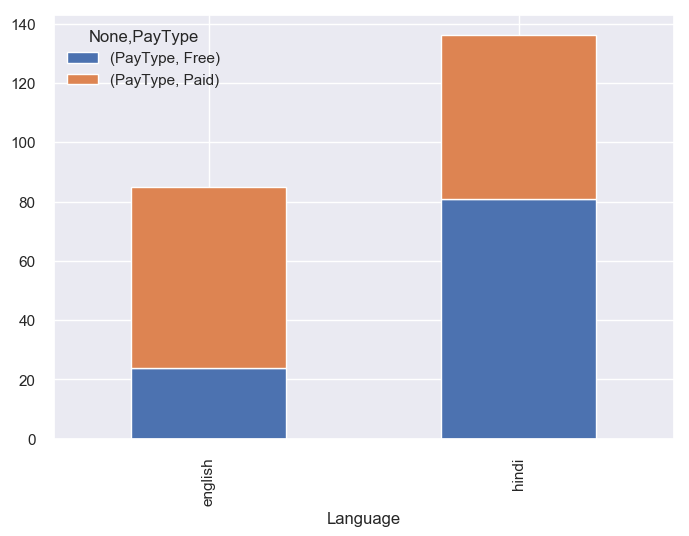

In [45]:
dfTemp =df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']
dfStack = dfTemp[dfTemp['Language'].isin(['hindi','english'])]
dfStack = dfStack.groupby(['Language','PayType']).agg({'PayType':"count"})
dfStack = dfStack.unstack()
dfStack.plot.bar(stacked=True)


From the above Hindi has more Free channels and english it is vice-versa.

Text(0.5, 1.0, 'Master List-South Region Distribution')

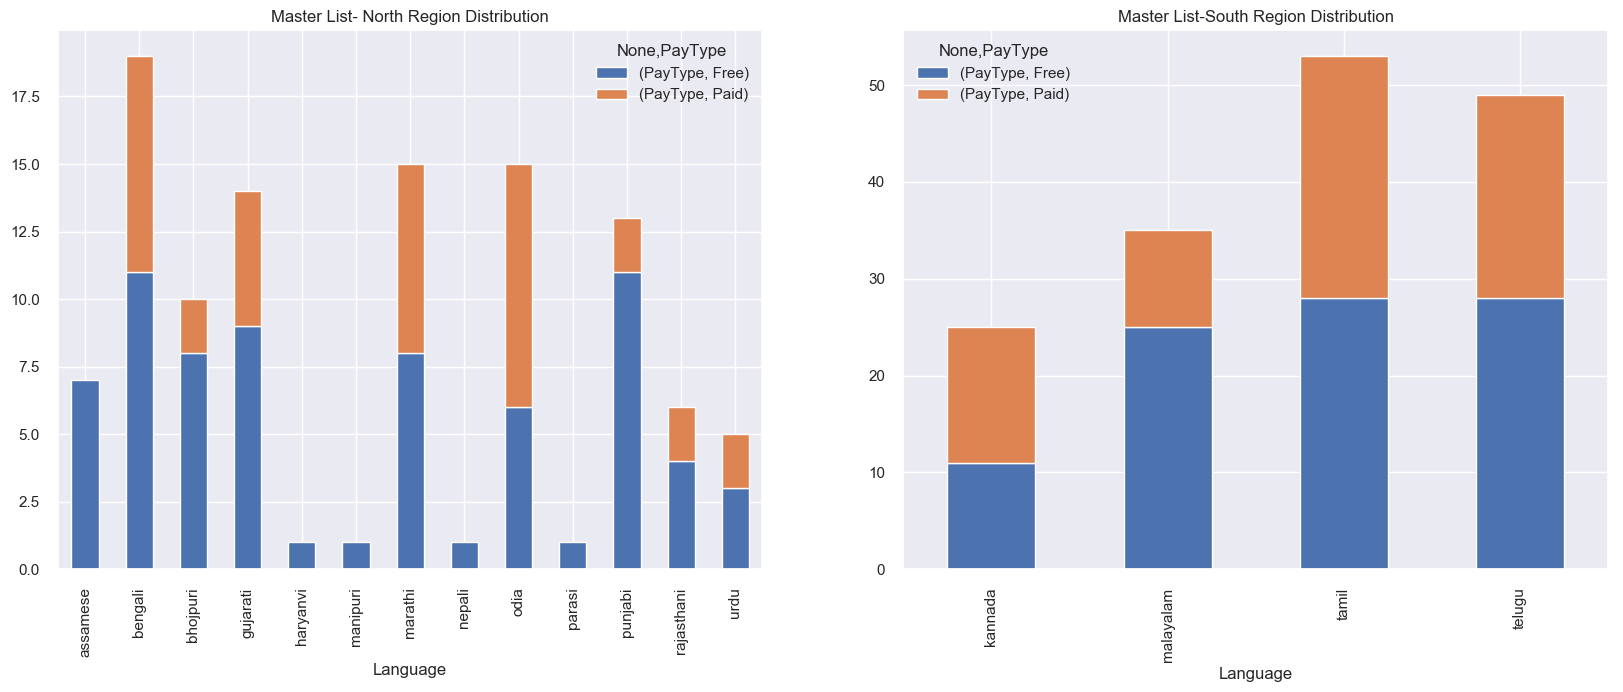

In [46]:
f,ax = plt.subplots(1,2,figsize=(20,7))

dfTemp =df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']
dfTemp = dfTemp[~dfTemp['Language'].isin(['hindi','english'])]
dfStack =dfTemp[dfTemp['Region']=='North']

dfStack = dfStack.groupby(['Language','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(ax=ax[0],stacked=True)
ax[0].set_title('Master List- North Region Distribution')


dfStack =dfTemp[dfTemp['Region']=='South']
dfStack = dfStack.groupby(['Language','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(ax=ax[1],stacked=True)
ax[1].set_title('Master List-South Region Distribution')

From the above , we see for South region Malayalam offers more free over paid. And in North it is punjabi, bhojpuri, rajasthani and gujrati.
It is worth noting to see no paid channels under nepali, parasi, manipuri and harayanvi(and this is due to the fact that all except Nepal 1 are dd channels which are mandatory to air)

Now, lets us see what is the distribution of the language for the sample users

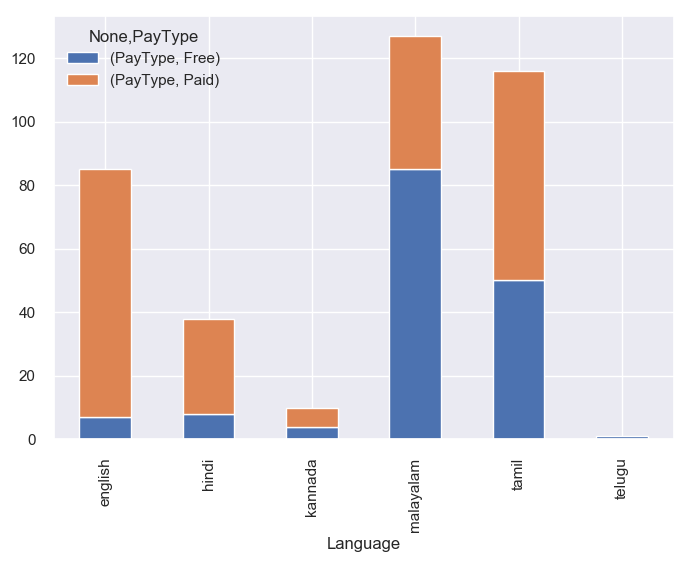

In [47]:
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']

dfStack =dfTemp[dfTemp['User_Name']!='U']
dfStack = dfStack.groupby(['Language','PayType']).agg({'PayType':"count"})

dfStack = dfStack.unstack()
dfStack.plot.bar(stacked=True)

Text(0.5, 1.0, 'Sample(All Users) -Language (Paid - Frequency(%) Distribution)')

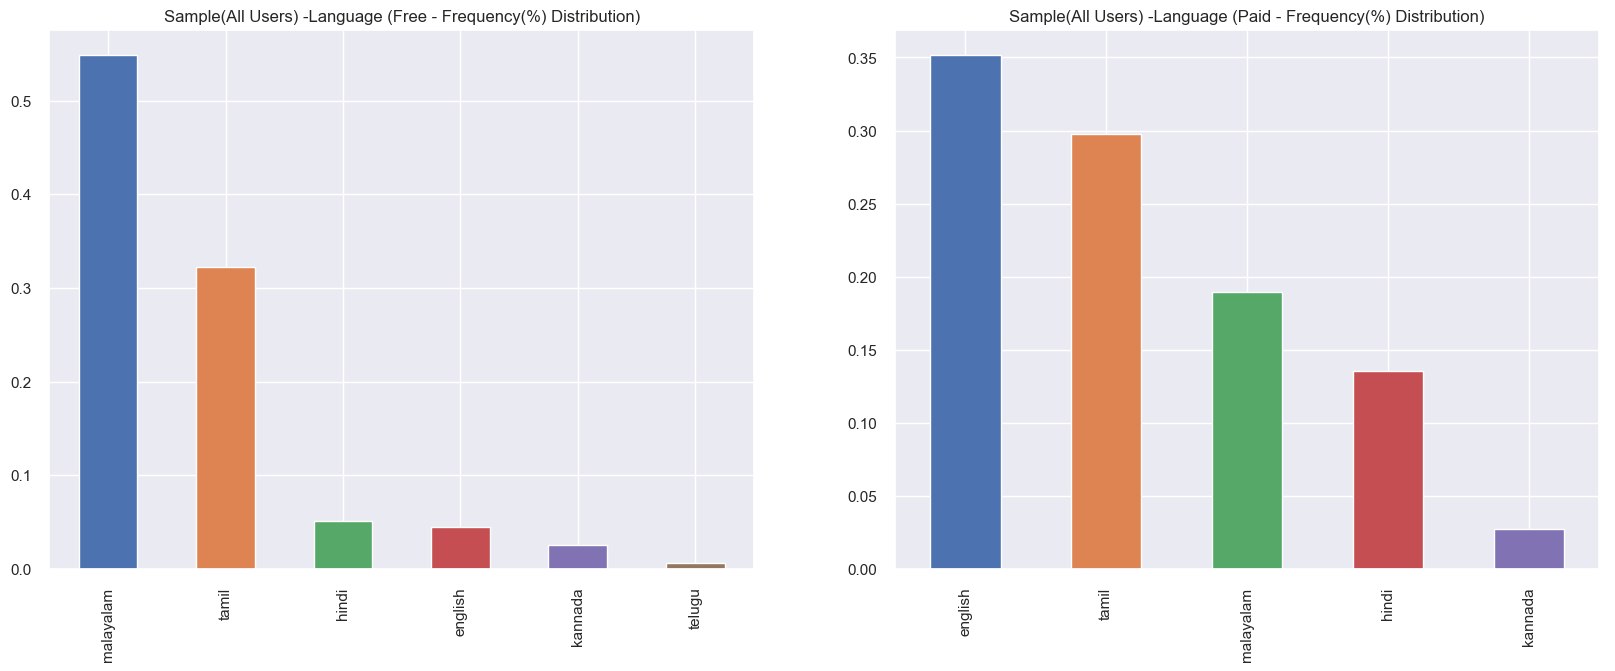

In [48]:
f,ax = plt.subplots(1,2,figsize=(20,7))
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']
(dfTemp[dfTemp.Channel_Cost_Per_Month ==0]['Language'].value_counts()/
 len(dfTemp[dfTemp.Channel_Cost_Per_Month ==0])).plot.bar(ax=ax[0])
(dfTemp[dfTemp.Channel_Cost_Per_Month !=0]['Language'].value_counts()/
 len(dfTemp[dfTemp.Channel_Cost_Per_Month !=0])).plot.bar(ax=ax[1])

ax[0].set_title('Sample(All Users) -Language (Free - Frequency(%) Distribution)')
ax[1].set_title('Sample(All Users) -Language (Paid - Frequency(%) Distribution)')


Text(0.5, 1.0, 'Live Language (Paid - Frequency Distribution)')

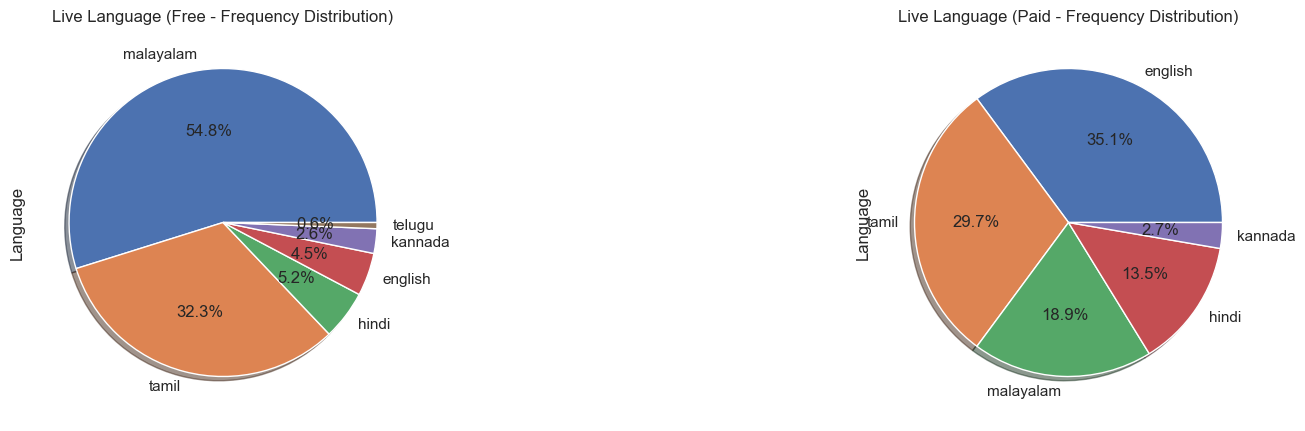

In [49]:
f,ax = plt.subplots(1,2,figsize=(20,5))
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']

#dfTemp['Genre'].value_counts().plot.pie()
dfTemp['Language'][dfTemp['PayType'] == 'Free'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
dfTemp['Language'][dfTemp['PayType'] == 'Paid'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Live Language (Free - Frequency Distribution)')
ax[1].set_title('Live Language (Paid - Frequency Distribution)')

From the above, we see that the distribution under paid is spread high acrosh english, tamil , malayalam. And under Free its malayalam and tamil. Interesting to see no hindi picked up under Free.

Now Let us see the average no. of channels selected under paid for this sample.

In [50]:
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp =dfTemp[dfTemp['Genre']!='na']
dfTemp =dfTemp[dfTemp['PayType']=='Paid']
AvgNoOfChannels = int(dfTemp['Channel_Name'].count()/dfTemp['User_Name'].nunique())
print("Total Pay channels selected : {}".format(dfTemp['Channel_Name'].count()))
print("Total No of Users: {}".format(dfTemp['User_Name'].nunique()))
print("Average Channels Selected : {}".format(AvgNoOfChannels))

Total Pay channels selected : 222
Total No of Users: 8
Average Channels Selected : 27


Next, We find out the average cost distribution under each Genre from the Master List using a pivot table.

              Channel_Cost_Per_Month
Genre                               
gec                        10.170517
infotainment                2.386923
kids                        5.153333
lifestyle                   1.820000
movies                      7.991935
music                       2.855000
news                        1.080968
sports                     15.118750


Text(0.5, 1.0, 'Average Cost(%) Distribution')

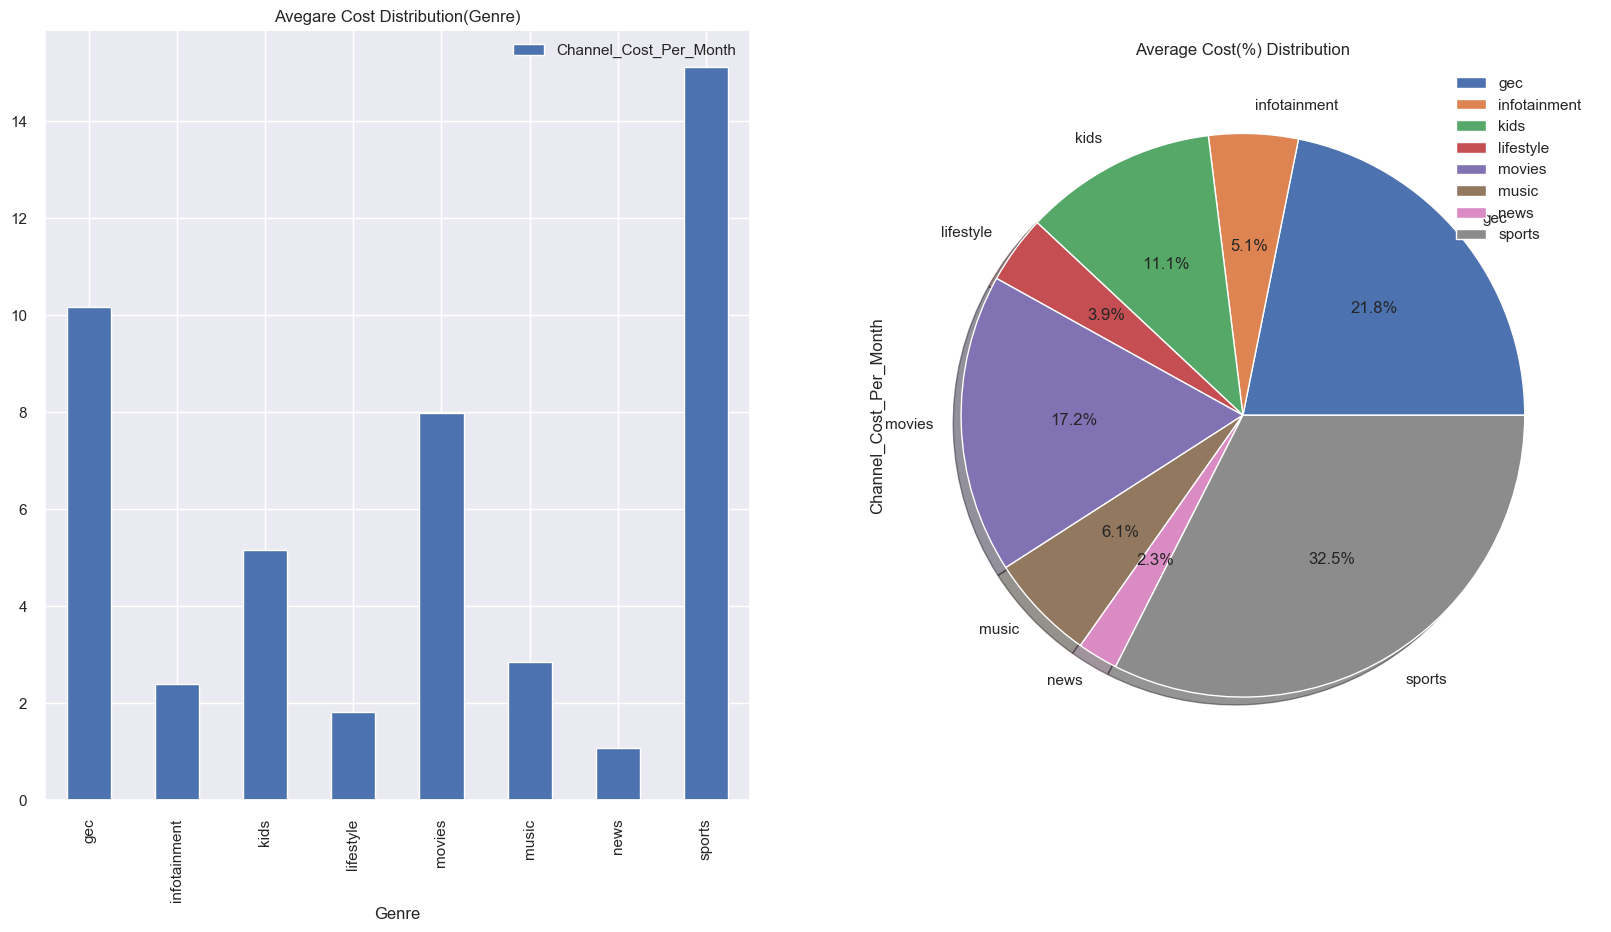

In [51]:
f,ax = plt.subplots(1,2,figsize=(20,10))

dfTemp =df_myPackData[df_myPackData['Ch_Type']=='SD']
dfTemp = dfTemp[dfTemp['PayType']=='Paid']
dfTemp = dfTemp[dfTemp['PayCat']!='F-NCF']
dfTemp = dfTemp[dfTemp['Language'].isin(['tamil','malayalam','kannada','hindi','english','telugu'])]

pdAvg = pd.pivot_table(dfTemp,index=["Genre"],values=["Channel_Cost_Per_Month"],aggfunc=np.average)
print(pdAvg)
pd.pivot_table(dfTemp,index=["Genre"],values=["Channel_Cost_Per_Month"],aggfunc=np.average).plot.bar(ax=ax[0])
ax[0].set_title('Avegare Cost Distribution(Genre)')

pd.pivot_table(dfTemp,index=["Genre"],values=["Channel_Cost_Per_Month"],aggfunc=np.average).plot.pie(autopct='%1.1f%%',
                                                                                                     subplots=True,ax=ax[1],
                                                                                                     shadow=True)
ax[1].set_title('Average Cost(%) Distribution')

### 4.5 What is the cost that can be deduced for a Pack using Genre distribution and the average cost  information ?

Now, Assuming a average selection of 27 channels under paid with the below distribution,

-GEC          (36%)
-Movies       (14%)
-News         (13%)
-Music        (11%)
-Kids         (12%)
-Infotainment (10%)
-Sports       (3%)
-Lifestyle    (1%)

Let us compute the average cost of the pack selection(we will mulitply the above with the average cost computed above).

In [52]:
#Get the average cost of the genre from the master list for the paid and using the same language.
dfTemp =df_myPackData[df_myPackData['Ch_Type']=='SD']
#dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp = dfTemp[dfTemp['PayType']=='Paid']
dfTemp = dfTemp[dfTemp['PayCat']!='F-NCF']
dfTemp = dfTemp[dfTemp['Language'].isin(['tamil','malayalam','kannada','hindi','english','telugu'])]

#Get he average cost for each Genre
pdAvg = pd.pivot_table(dfTemp,index=["Genre"],values=["Channel_Cost_Per_Month"],aggfunc=np.average)

list1 = pdAvg.values.round(2)
list1 = list1.tolist()

list3 = list();
x=0
for items in list1:
    list3.append(items[0])
list2 = pdAvg.index
list2 = list2.tolist()

pdTempAvgCost = pd.DataFrame([list3],columns=list2)
pdTempAvgCost = pdTempAvgCost.unstack().reset_index()
pdTempAvgCost.rename(columns={'level_0':'Genre','level_1':'Dummy',0:'AvgCost'},inplace=True)
pdTempAvgCost = pdTempAvgCost.drop(['Dummy'], axis=1)
print(pdTempAvgCost)

#pdTempAvgGenre = pd.DataFrame([[0.3,0.2,0.14,0.12,0.11,0.1,0.03]],columns=['gec','movies','news','music',
#                                                                           'kids','infotainment','sports'])
#Get the average channels watched for each Genre
dfTemp =df_LiveUserData[df_LiveUserData['Ch_Type']=='SD']
dfTemp = dfTemp[dfTemp['PayType']=='Paid']
dfTemp = dfTemp[dfTemp['PayCat']!='F-NCF']
dfTemp = dfTemp[dfTemp['Language'].isin(['tamil','malayalam','kannada','hindi','english','telugu'])]
dfAvgChan = (dfTemp[dfTemp.Channel_Cost_Per_Month !=0]['Genre'].value_counts()/len(dfTemp[dfTemp.Channel_Cost_Per_Month !=0]))

list1 = dfAvgChan.values.round(2)
#print(list1)

list2 = dfAvgChan.index
list2 = list2.tolist()
#print(list2)

pdTempAvgGenre = pd.DataFrame([list1],columns=list2)
pdTempAvgGenre = pdTempAvgGenre.unstack().reset_index()

pdTempAvgGenre.rename(columns={'level_0':'Genre','level_1':'Dummy',0:'PercProb'},inplace=True)
pdTempAvgGenre = pdTempAvgGenre.drop(['Dummy'], axis=1)
pdTempAvgGenre['Channel_Count'] =  round(pdTempAvgGenre['PercProb']*AvgNoOfChannels,0)
print(pdTempAvgGenre)

pdMergedData = pd.merge(pdTempAvgCost,pdTempAvgGenre,how='inner',on='Genre')
pdMergedData['Channel_Cost'] = pdMergedData['Channel_Count'] * pdMergedData['AvgCost']
print(pdMergedData.sum())

          Genre  AvgCost
0           gec    10.17
1  infotainment     2.39
2          kids     5.15
3     lifestyle     1.82
4        movies     7.99
5         music     2.86
6          news     1.08
7        sports    15.12
          Genre  PercProb  Channel_Count
0           gec      0.36           10.0
1        movies      0.14            4.0
2          news      0.13            4.0
3          kids      0.12            3.0
4         music      0.11            3.0
5  infotainment      0.10            3.0
6        sports      0.03            1.0
7     lifestyle      0.01            0.0
Genre            gecinfotainmentkidslifestylemoviesmusicnewssports
AvgCost                                                      46.58
PercProb                                                         1
Channel_Count                                                   28
Channel_Cost                                                 184.3
dtype: object


From the above it is deduced that the avg cost would be around <b>185 rs</b> (around 30 channels chosen under paid) and with the below distribution for Genre,
-GEC          (30%)
-Movies       (20%)
-News         (14%)
-Music        (12%)
-Kids         (11%)
-Infotainment (10%)
-Sports       (3%)

we add a +/- 20% variance to get the range as 148 rs to 217 rs.

And, finally we also need to add the NCF which is 153.40 rs to arrive at the Total Cost is now in the range <b> 301.40 rs to 370.40 rs </b>.
This indicates that there is an increase in the cost of cable fees(earlier it was 250 rs) in the range of 50 to 120 rs.

However, If we try the below 2 options we can be further reduce this cost,

option 1 : Apply the rule of thumb (as prescribed by TRAI - to keep the channel list around 50). Filter out the list channels which are only absolutely needed and discard the ones which we seldom or rarely watch. This if done wisely can reduce the cost by 5-10 %. which means the 185 can be further reduced in the range of  165 (10%) to 175(5%).

option 2 : Use the pyPackRecommendation tool to achive the benefits of pack which offer lesser cost and further 
    reduce the cost by 10 to 20%. This means the cost can be further brought down from 175 to the 
    range of 140 (assuming a 20% reduction) to 158(assumign a 10% reduction).

The new reduced cost would be in the range of <b> 295 rs to 312 rs </b>,which is still an increase of 45 to 60 rs. Hence, we conclude that yes there will be an increase in the cost of cable fees (earlier 250rs) even if we follow TRAI's instruction of choosing 50 channels and apply optimization on the overall selection by usign pyPackChannel selector.

Below are some thoughts to reduce those heartburns,
1. Reduce the NCF (which is currently a whopping 153.40 rs and is the major cost contribution if it can be reduced by half or 50 rs it will help end users a lot as this will help users to pick more of their choice of selection. however, this has to be reviewed by TRAI and other regulatory bodies and is not an immediated solution
2. If the TRP increases or if the revenue increases from the advertisements, the benefits can be passed on back to customers by reducing the cost of channels. This is again which broadcaster has to take a decision and not in the hands of consumers.



## 5. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better anlaysis on the data. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.

- The most important inference drawn from all this analysis is, The noise around the cable fee being increased after the new TRAI regulation seems to be true. The cost has gone up by an average 100 Rs. However, there are ways to further optimize this cost if the user can follow the below to approaches

    - option 1 : Filtering out the list channels which are only absolutely needed. Rule of thumb as suggested by TRAI is to have a channel list of close to 50. To help in filtering, create a list and categorize them as MustHave, ShouldHave and NiceToHave.This will help in making quick decision in dropping the channels while doing another review after you get the recommendation report(when channel's don't fall under any suitable packs).

    - option 2 : Use the pyPackRecommendation tool to achive the benefits of using packs which offer cost savings(alternative to purchasing channels in alacarte). Use the list of Must,Should and Nice to chop down the Nice to have channels if they do not get picked up the recommendation tool.